# Method Definitions

In [1]:
from water_analysis import Data
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the Dataset

In [2]:
# The dataframe
df= pd.read_csv("sqlDump.csv", header= 1, parse_dates= ['Tim'], index_col= "Tim")

In [3]:
data_class= Data(df)

> Help method can:

* Be call on the Data class to know the available `methods`
* Also be call on each methods in the `Data class`|

e.g ?Data or help(Data)

In [4]:
data_class.data.head()

,Filter_Name,Filter_Location,Filter_Location.1,Filter_Location.2
Tim,,,,
2020-03-05 09:57:14,Tap 6,Faisal Town B Block,34.0,17
2020-03-05 09:57:13,Tap 6,Faisal Town B Block,66.0,33
2020-03-05 09:57:12,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:11,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:10,Tap 6,Faisal Town B Block,69.0,34


# Renaming the Column Header

In [5]:
data_class.rename_column_name(["Filter_name", 'Filter_location', "Amount_water", "Pulses"])

In [6]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-05 09:57:14,Tap 6,Faisal Town B Block,34.0,17
2020-03-05 09:57:13,Tap 6,Faisal Town B Block,66.0,33
2020-03-05 09:57:12,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:11,Tap 6,Faisal Town B Block,72.0,36
2020-03-05 09:57:10,Tap 6,Faisal Town B Block,69.0,34


# Different Filter name

In [7]:
data_class.data['Filter_name'].unique()

array(['Tap 6', 'Tap 7', 'Tap 4', 'Tap 1', 'Tap 2', 'Tap 5', 'ITU_Tap2',
       'ITU_Tap3', 'ITU_Tap1'], dtype=object)

# Sorting the Filter name orderly

In [8]:
data_class.sort_filter_name()

In [9]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 15:37:44,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 10:17:21,ITU_Tap1,ITU Lahore,403.329987,201
2020-03-03 10:10:32,ITU_Tap1,ITU Lahore,503.559998,251
2020-03-03 13:47:07,ITU_Tap2,ITU Lahore,435.109985,217


# Renaming incorrect Filter name

In [10]:
data_class.rename_tap({
    'ITU_Tap2': 'Tap 2',
    'ITU_Tap1': "Tap 1",
    'ITU_Tap3': 'Tap 3'
})

In [11]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-03 15:37:44,Tap 1,ITU Lahore,403.329987,201
2020-03-03 10:17:21,Tap 1,ITU Lahore,403.329987,201
2020-03-03 10:10:32,Tap 1,ITU Lahore,503.559998,251
2020-03-03 13:47:07,Tap 2,ITU Lahore,435.109985,217


In [12]:
data_class.sort_filter_name()

In [13]:
data_class.data.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.000000,49


**Question 1.** ```Create functions that mimic the characterize errors - here, assuming I
want to check for surge error, I should be able to call this function
directly.```

In [14]:
specify_surge= data_class.mimic_surge_error()

Specify surge value: 150


In [15]:
specify_surge.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:42,Tap 1,Faisal Town B Block,98.0,49


In [16]:
specify_surge.tail()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 07:11:59,Tap 7,Faisal Town B Block,109.0,54
2020-03-04 12:09:43,Tap 7,Johar Town B1 Block,104.0,52
2020-03-03 08:29:25,Tap 7,Faisal Town B Block,0.0,0
2020-03-04 12:09:46,Tap 7,Johar Town B1 Block,106.0,53
2020-03-03 07:49:38,Tap 7,Faisal Town B Block,98.0,49


# Visualizing surge error

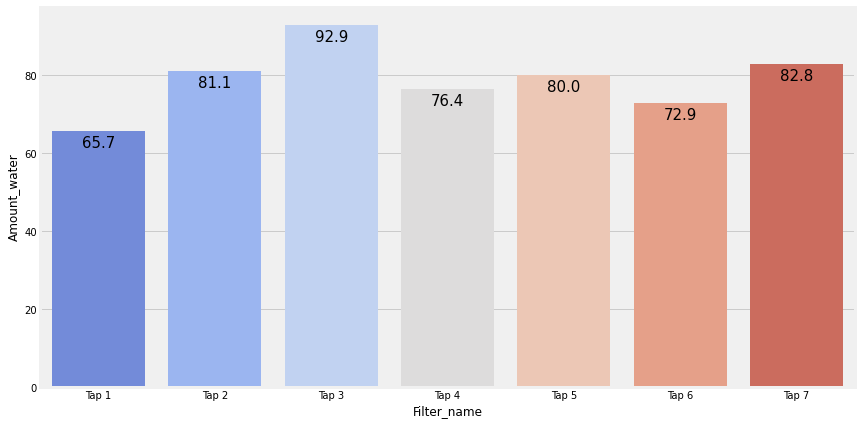

In [17]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(specify_surge)

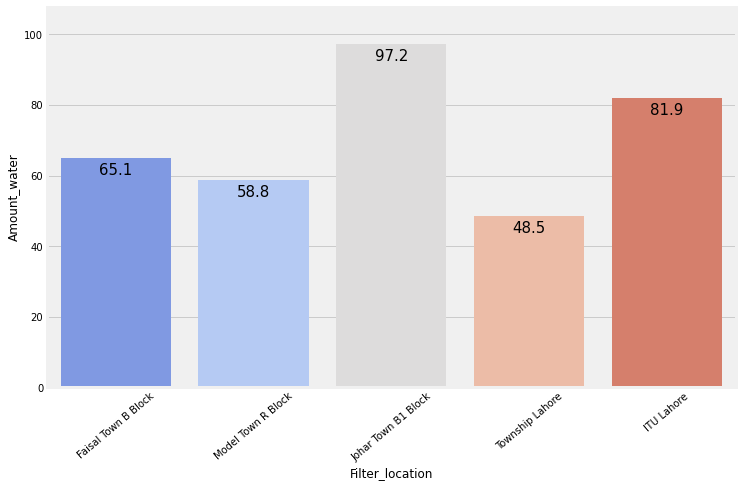

In [18]:
plt.figure(figsize= (11, 7))
data_class.visualizing_amount_location(specify_surge)


**Question 2.** ```Create a function that checks “Amount_Water” for data that is 150ml
and above but less than 500ml - the essence of this is that 150ml is the
standard amount of water per transaction. This would be a check for
successful transactions (meaning someone fetches the right amount of
water)```

In [19]:
# Water amount that is 150ml above but below 500ml
above150water= data_class.waterAmount_150_above()
above150water.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:49,Tap 1,Faisal Town B Block,229.000000,114
2020-03-02 20:04:49,Tap 1,Faisal Town B Block,242.000000,121
2020-03-02 20:05:49,Tap 1,Faisal Town B Block,234.000000,117
2020-03-03 18:53:14,Tap 1,Faisal Town B Block,224.000000,112


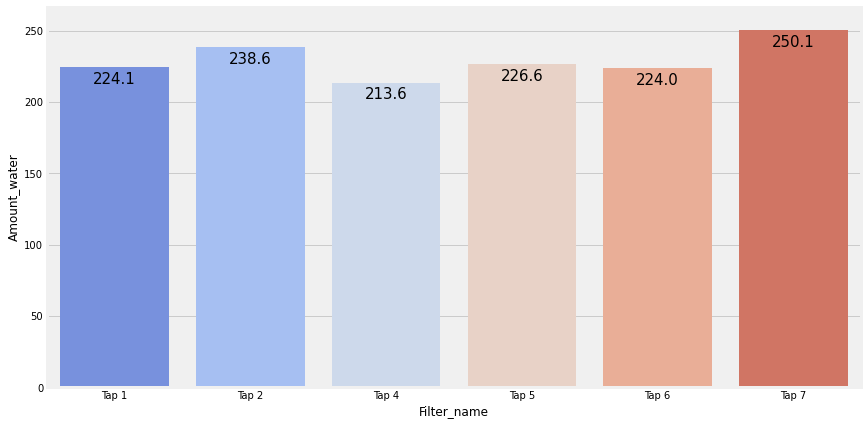

In [20]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(above150water)

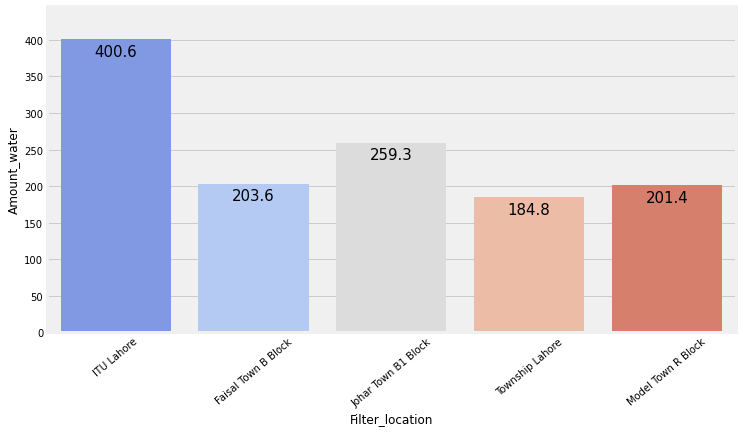

In [21]:
plt.figure(figsize= (11, 6))
data_class.visualizing_amount_location(above150water)

**Question 3.** ```Create a function that checks “Amount_Water” for data that is less
than 150ml.```

In [22]:
# Amount of water below 150ml
lesser_water= data_class.waterAmount_150_less()
lesser_water.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.0,49
2020-03-02 20:06:42,Tap 1,Faisal Town B Block,98.0,49


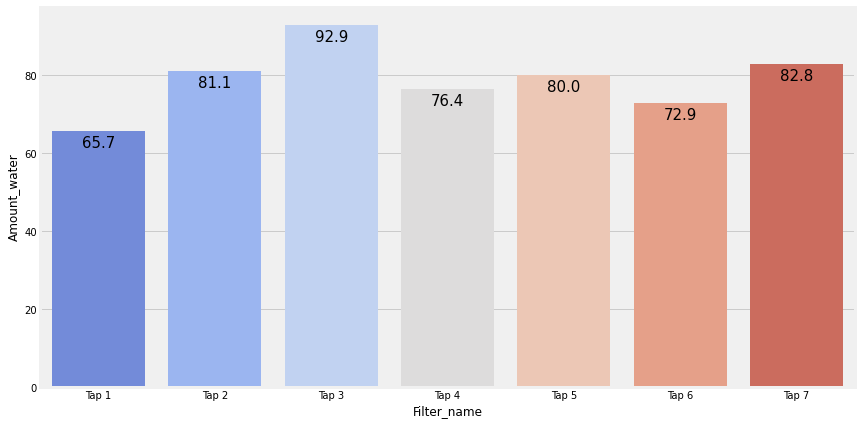

In [23]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_bar(lesser_water)

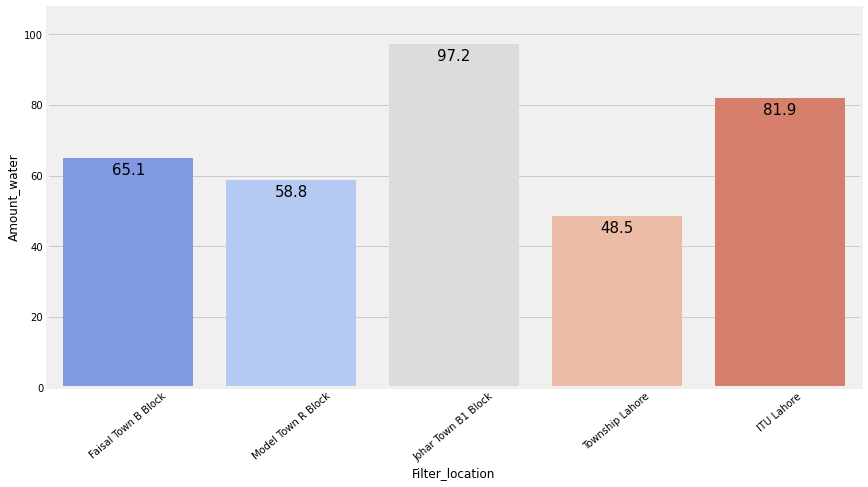

In [24]:
plt.figure(figsize= (13, 7))
data_class.visualizing_amount_location(lesser_water)

**Question 5.** ```Create a function that checks “Amount_Water” for zeros, and do an
imputation to fill up the zeros```

In [25]:
#Function checking for zero water amount
check4zero= data_class.waterAmount_0_values()
check4zero.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-02 20:05:28,Tap 1,Model Town R Block,0.0,0
2020-03-02 20:05:27,Tap 1,Model Town R Block,0.0,0
2020-03-02 20:03:50,Tap 1,Faisal Town B Block,0.0,0
2020-03-05 07:05:31,Tap 1,Johar Town B1 Block,0.0,0
2020-03-02 20:05:29,Tap 1,Model Town R Block,0.0,0


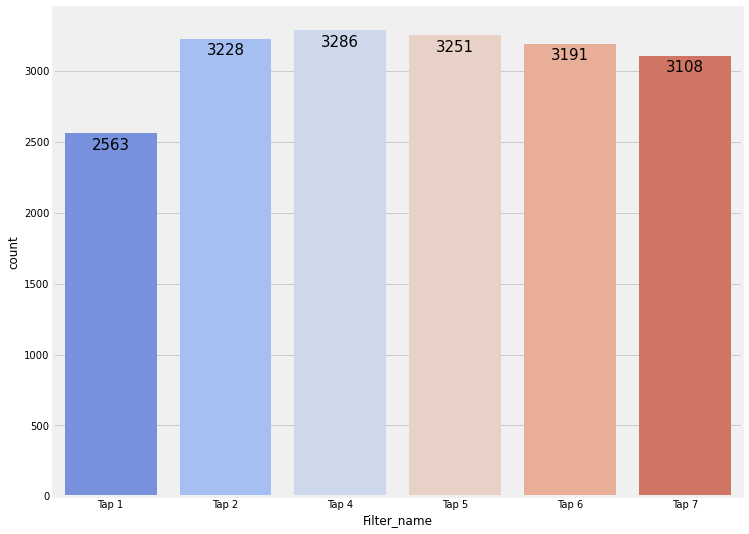

In [26]:
plt.figure(figsize= (11, 9))
data_class.visualizing_location_count(check4zero)

**Question 6.** ```Create a function with the title “leaky taps,” what this does is to
identify zero values in “Amount_Water” before imputation. The idea is
to map zero value to “Filter_Name”```

In [27]:
# Numbers of leaky tap
leaky= data_class.leaky_taps()
leaky.value_counts()

Tap 4    3286
Tap 5    3251
Tap 2    3228
Tap 6    3191
Tap 7    3108
Tap 1    2563
Name: Filter_name, dtype: int64

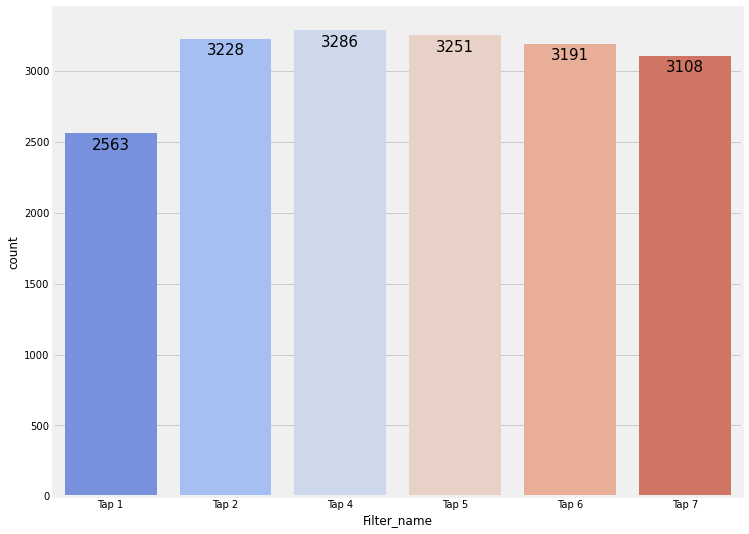

In [28]:
plt.figure(figsize= (11, 9))
data_class.visualizing_location_count(leaky)

# Visuals of all tap locations

C:\Users\SHOLAY\Desktop\ANALYSIS\WATER RESOURCES ANALYSIS\Water-Analysis-Project\water_analysis.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= (25, 13))
C:\Users\SHOLAY\Desktop\ANALYSIS\WATER RESOURCES ANALYSIS\Water-Analysis-Project\water_analysis.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= (25, 13))
C:\Users\SHOLAY\Desktop\ANALYSIS\WATER RESOURCES ANALYSIS\Water-Analysis-Project\water_analysis.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyp

Nothing to display here


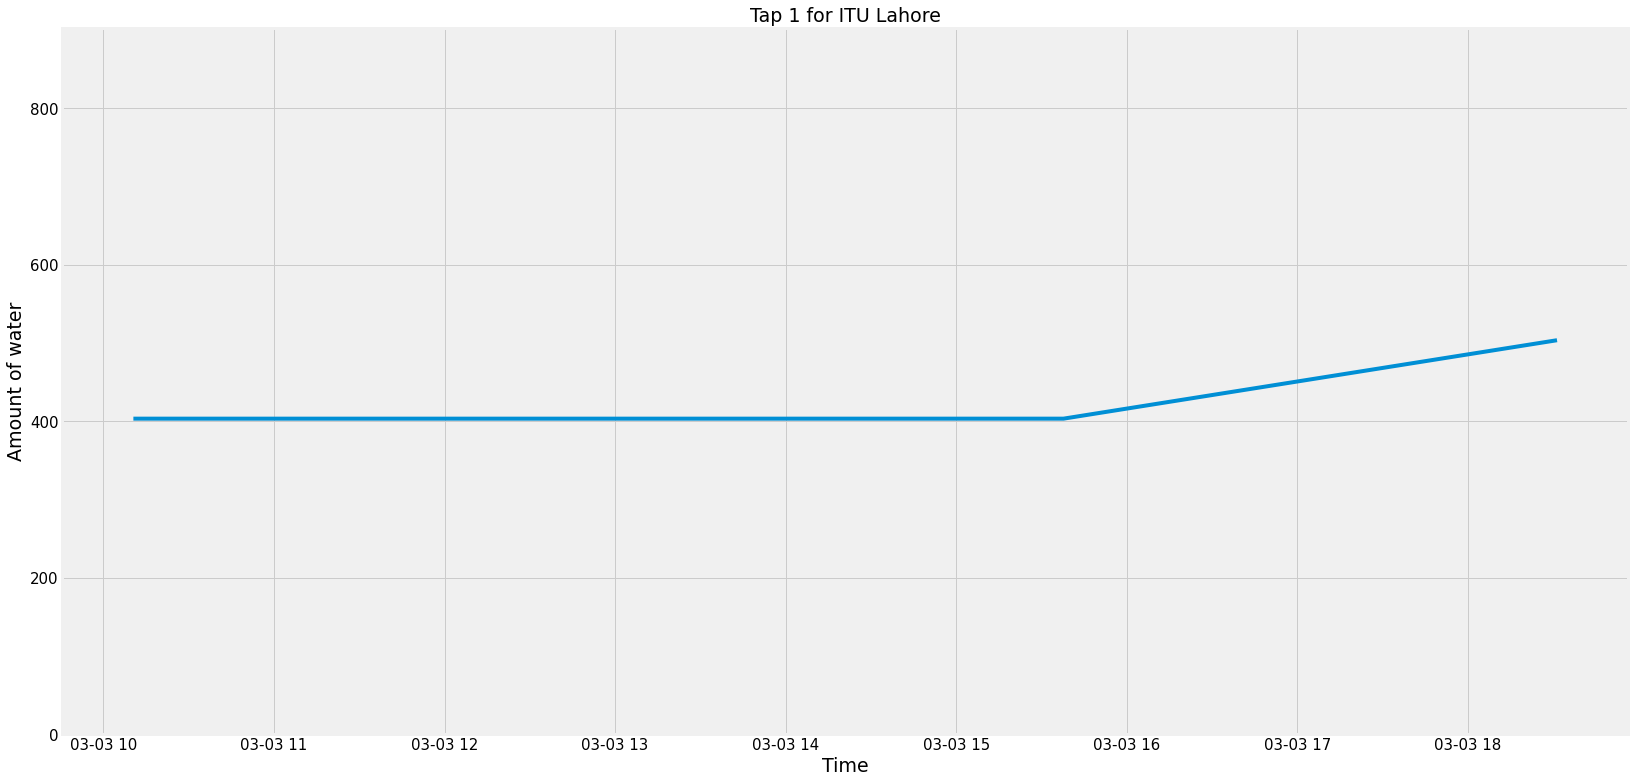

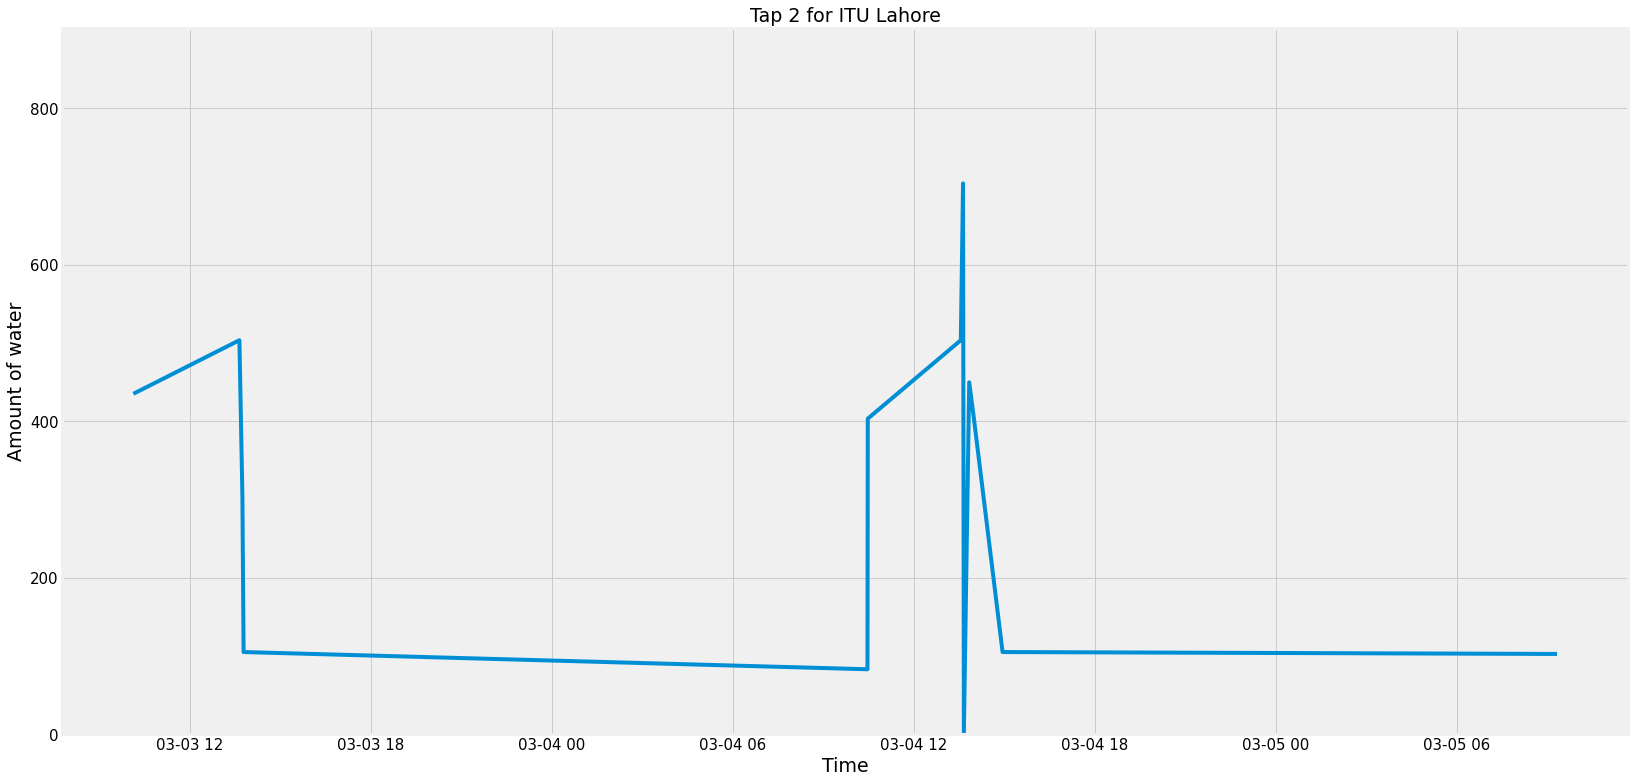

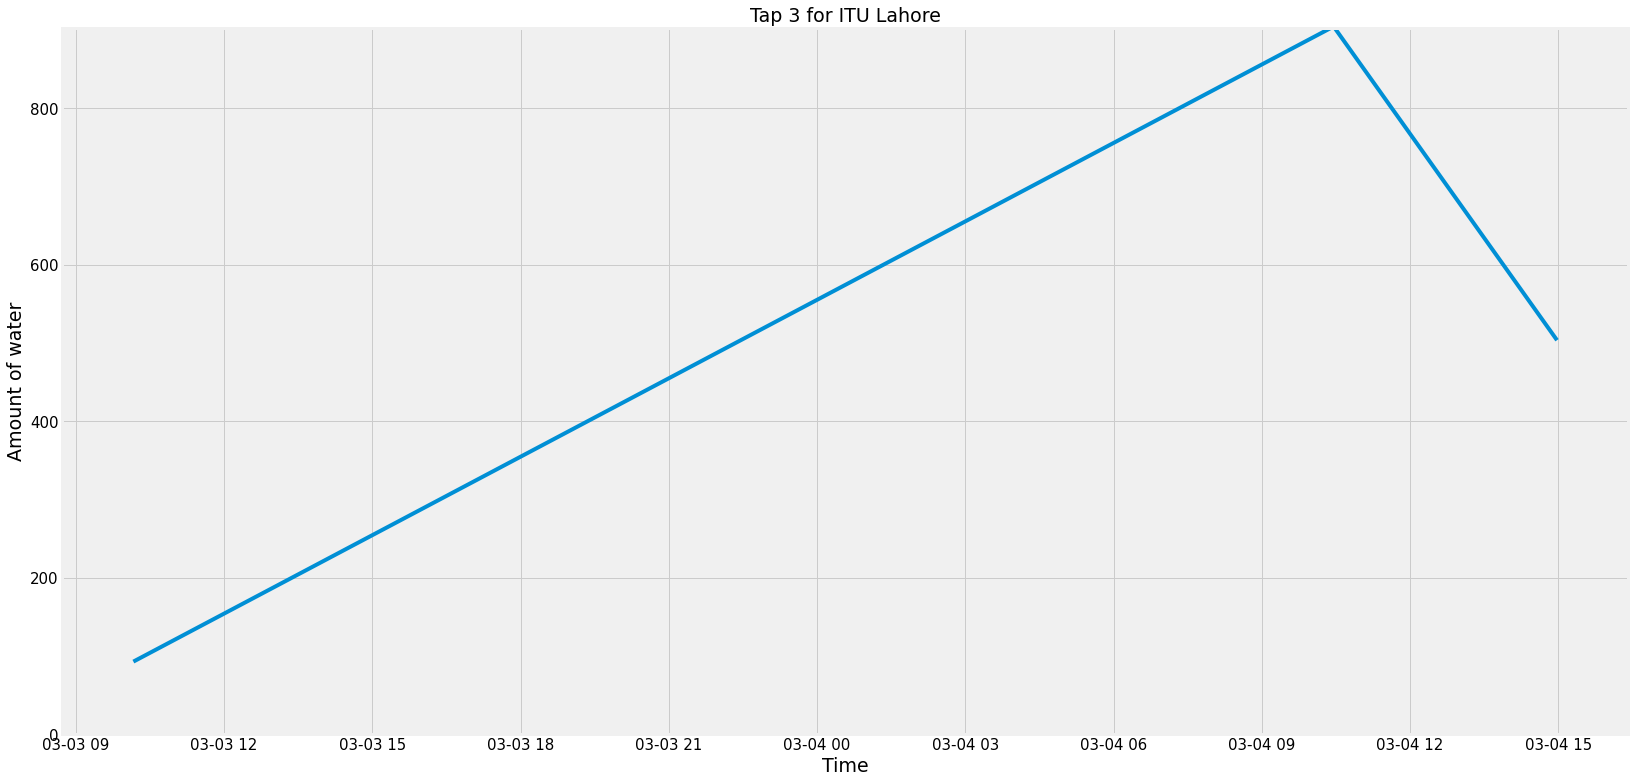

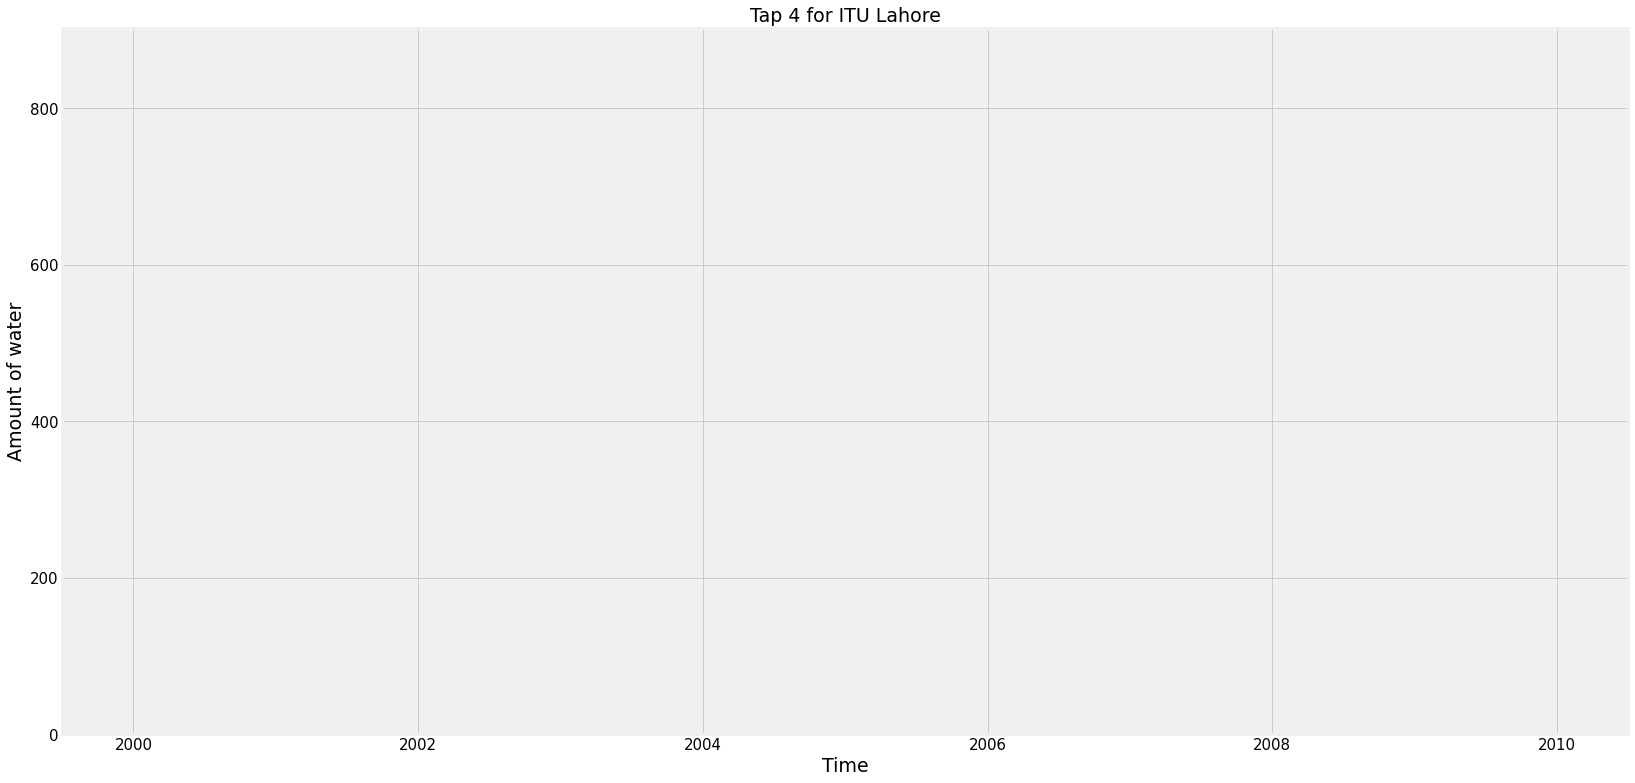

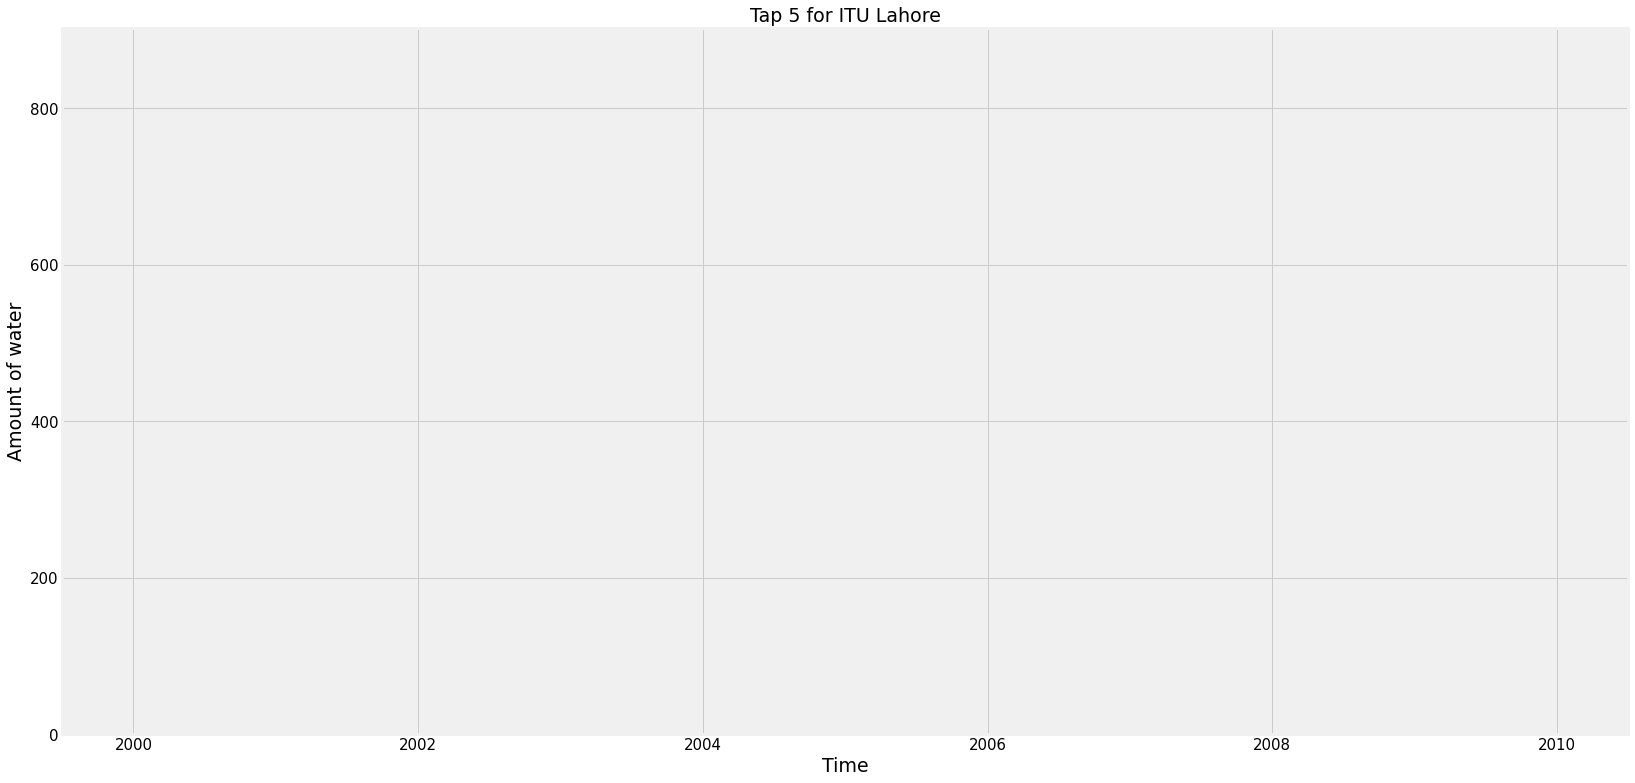

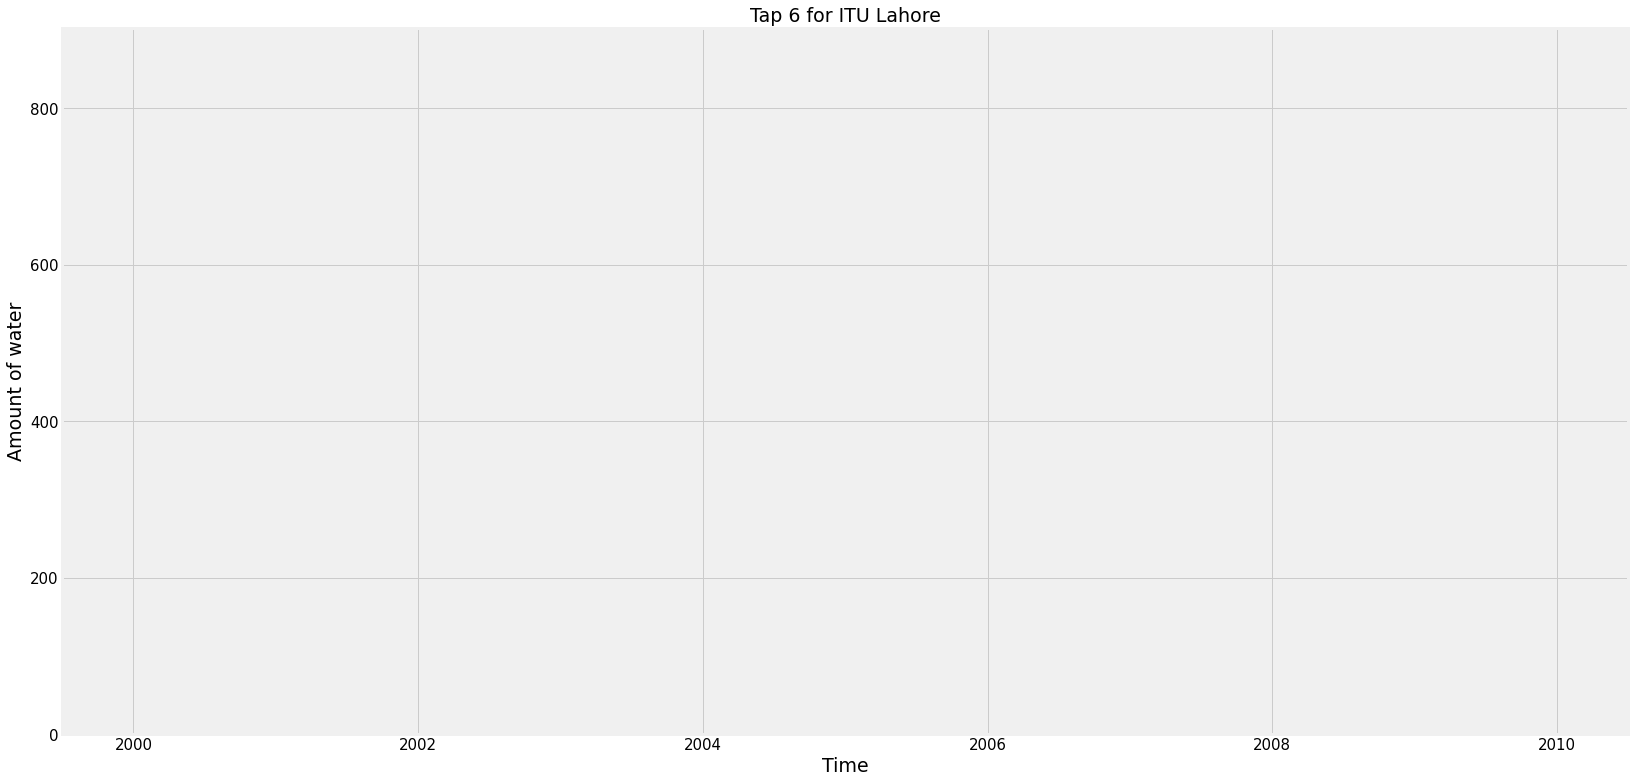

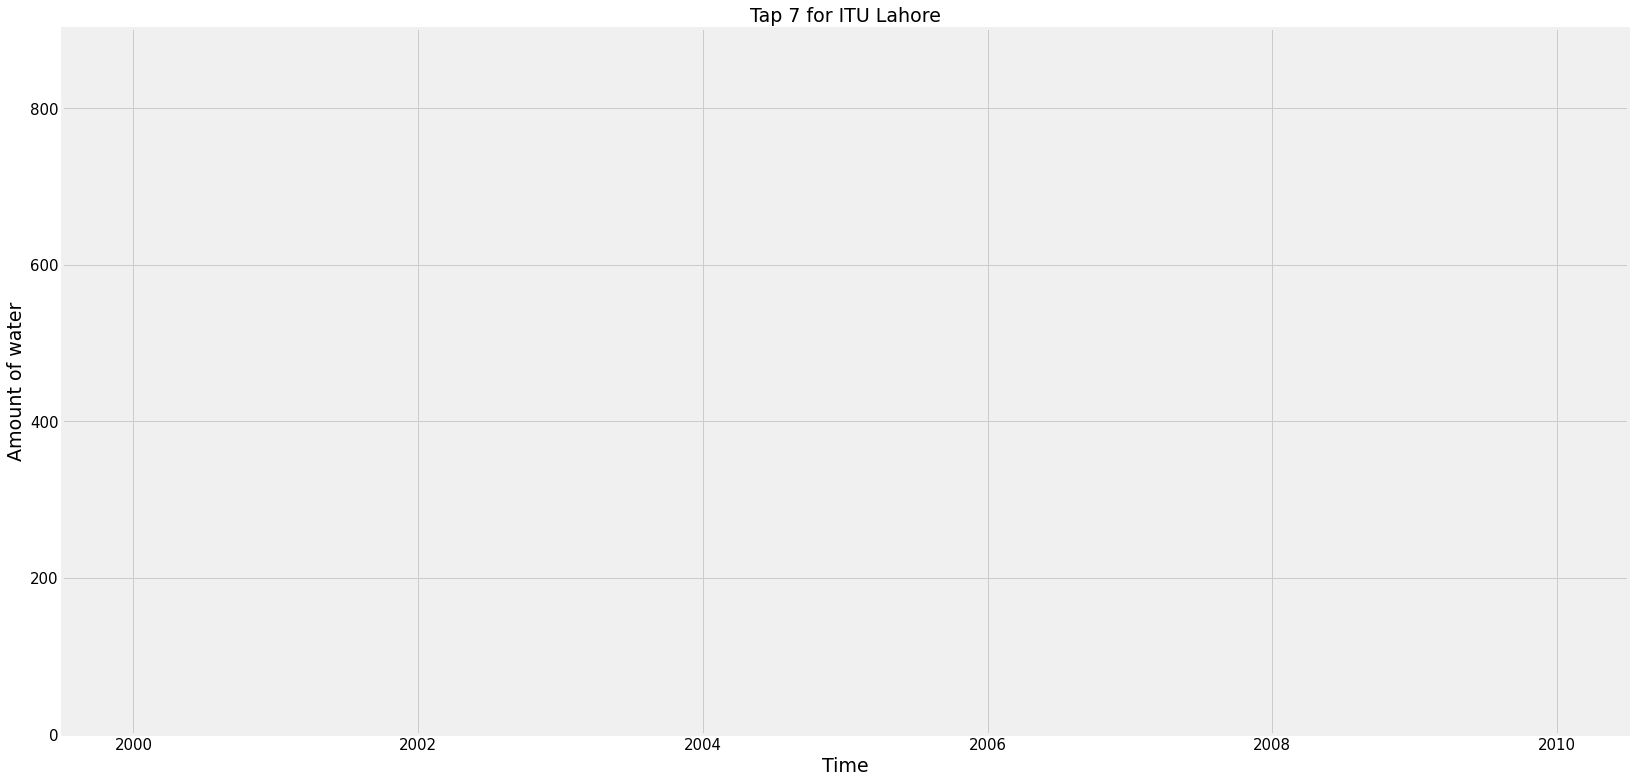

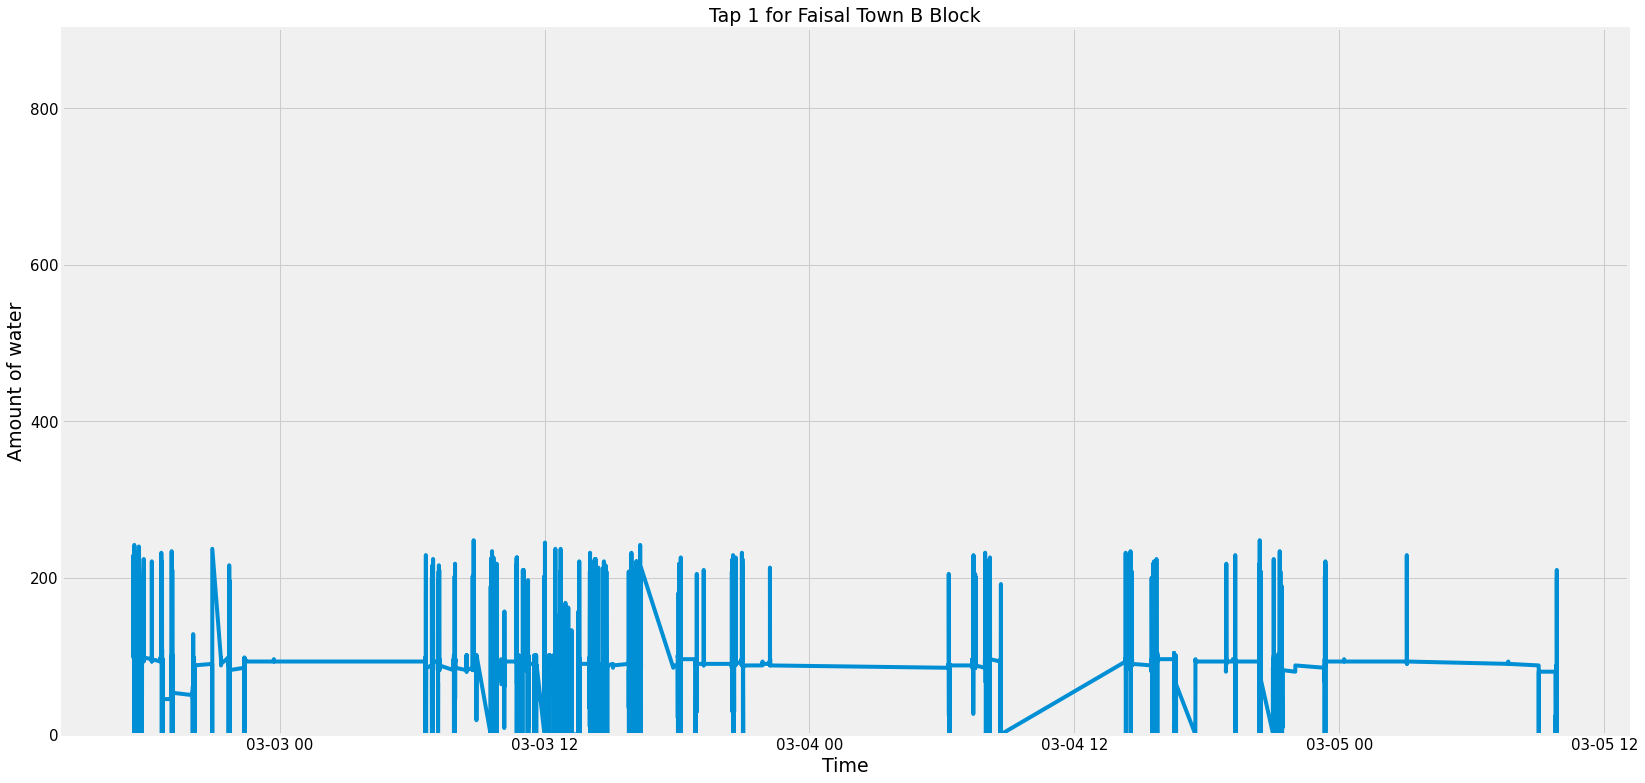

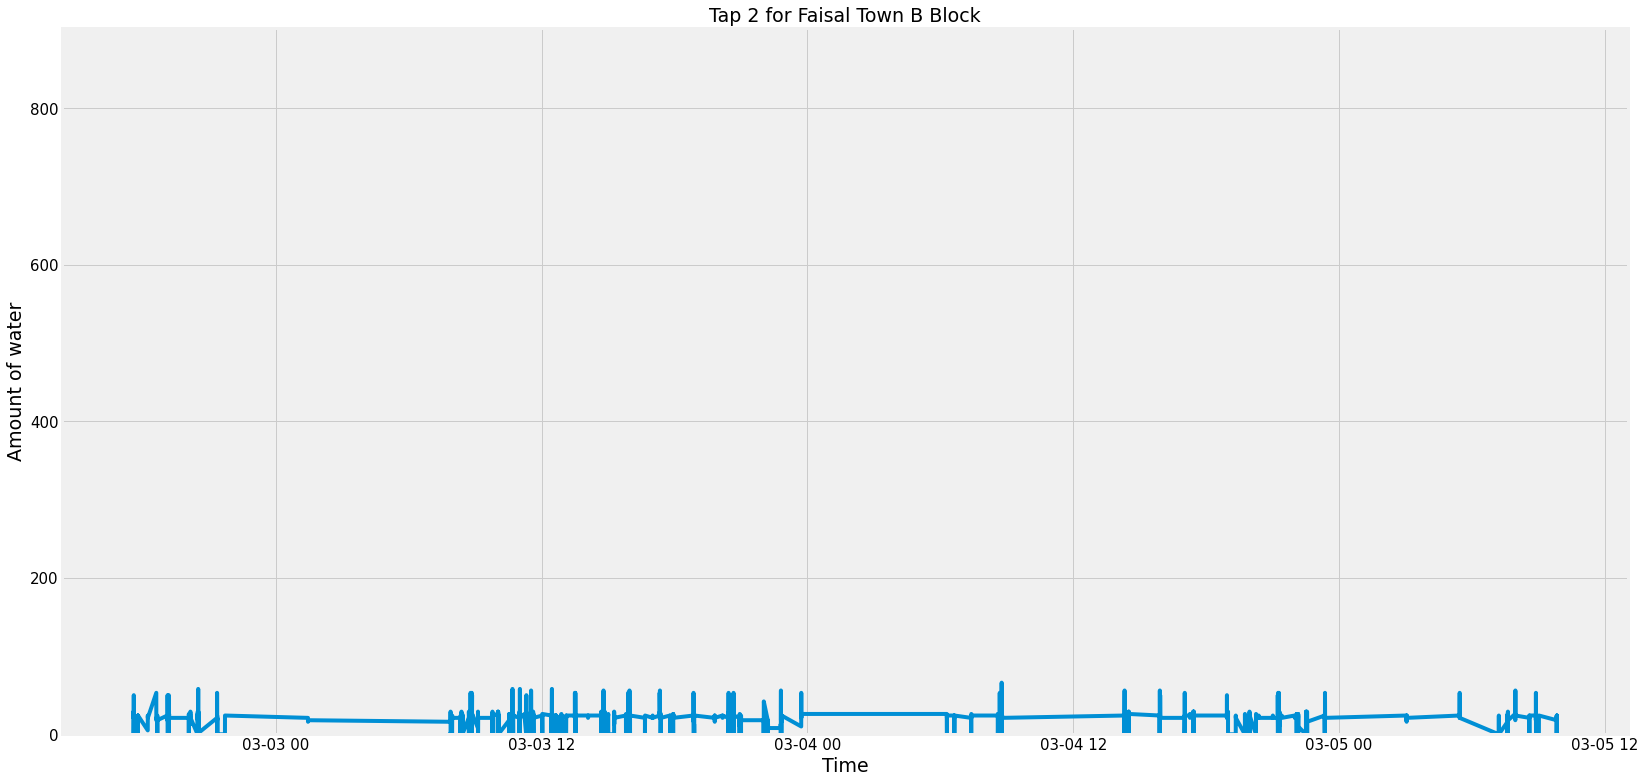

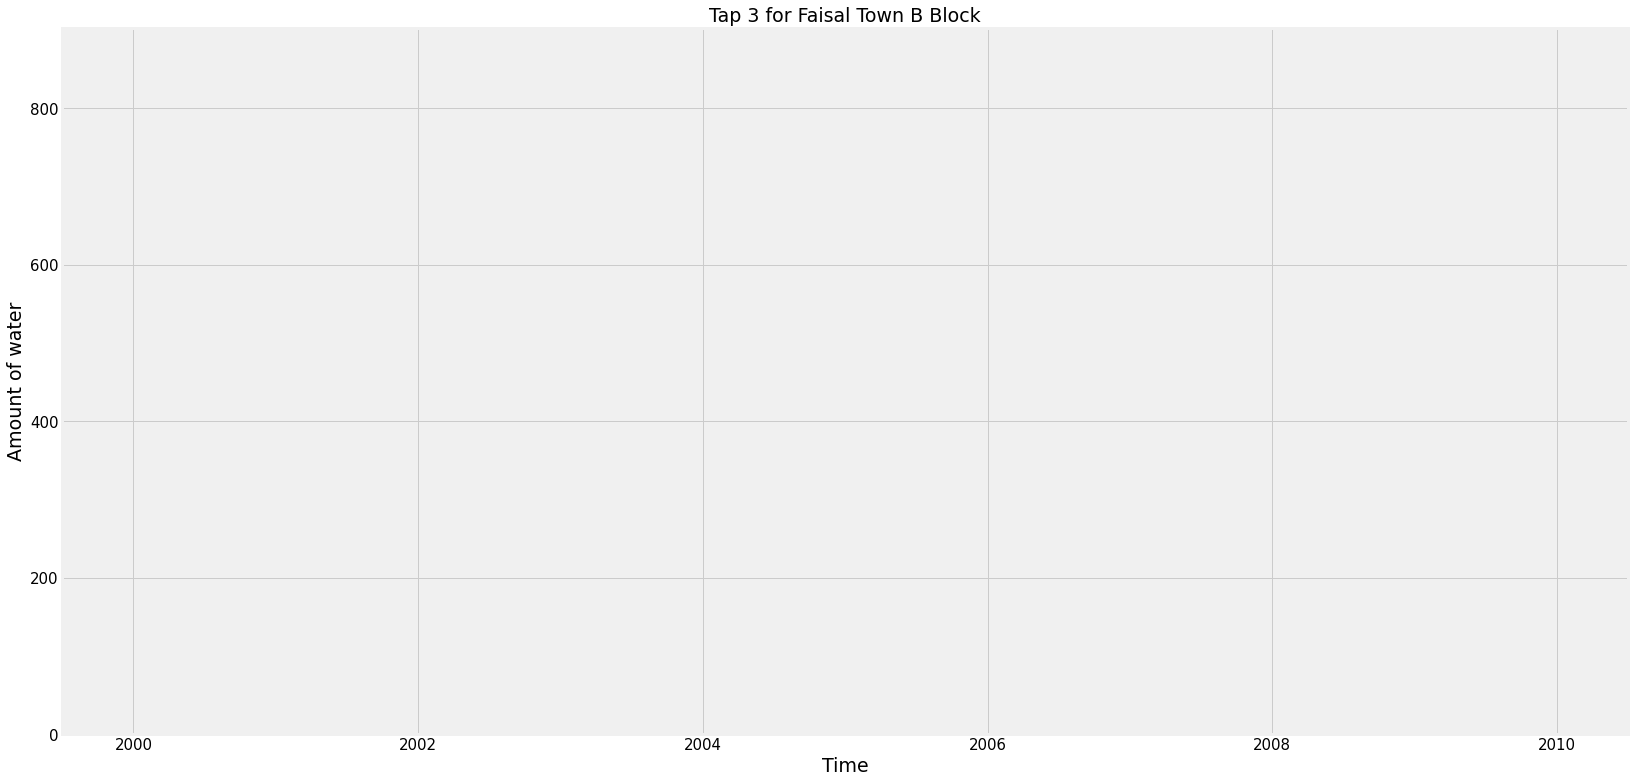

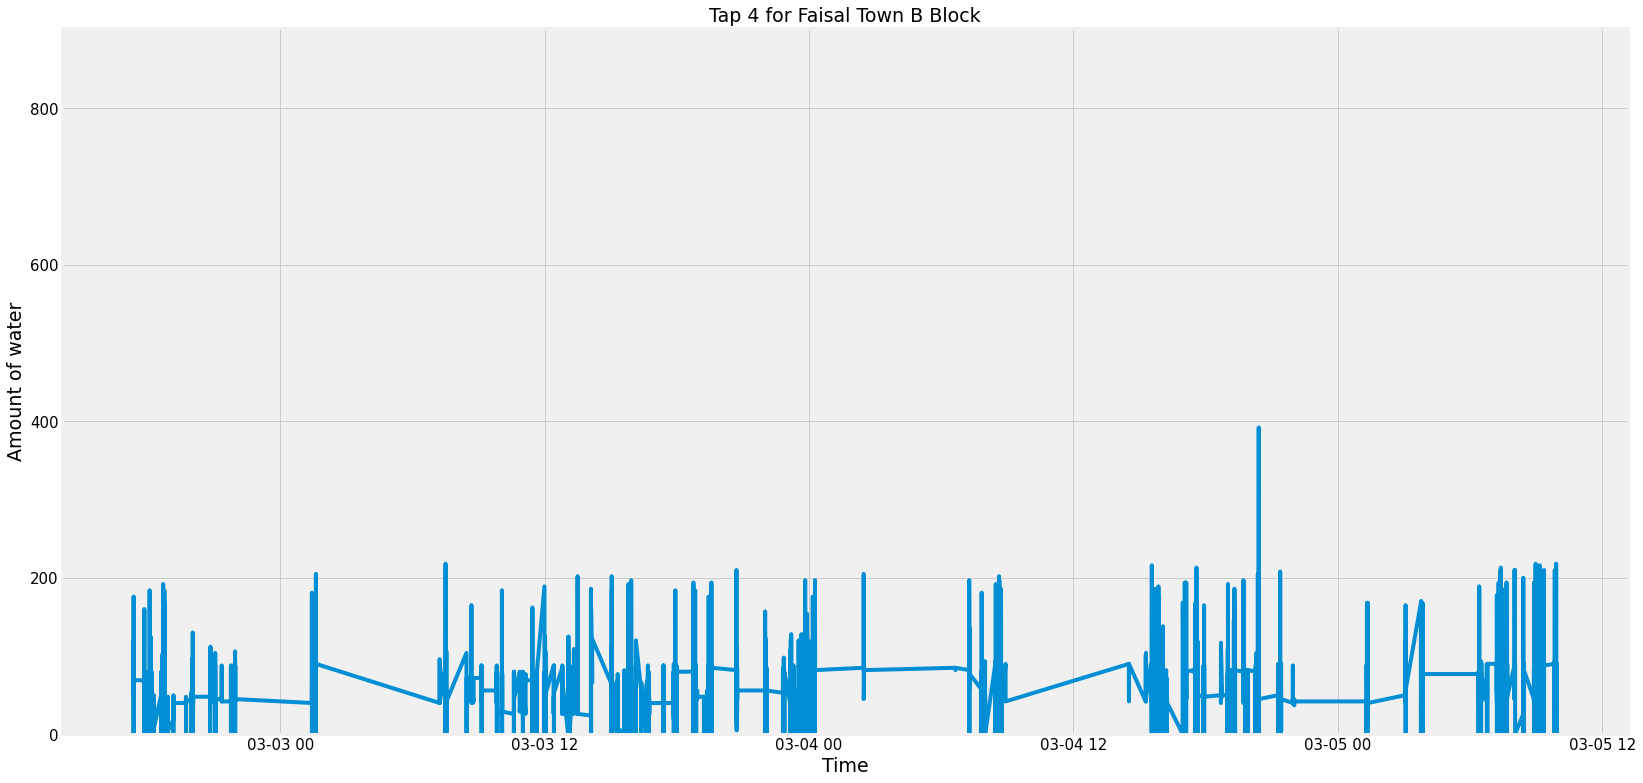

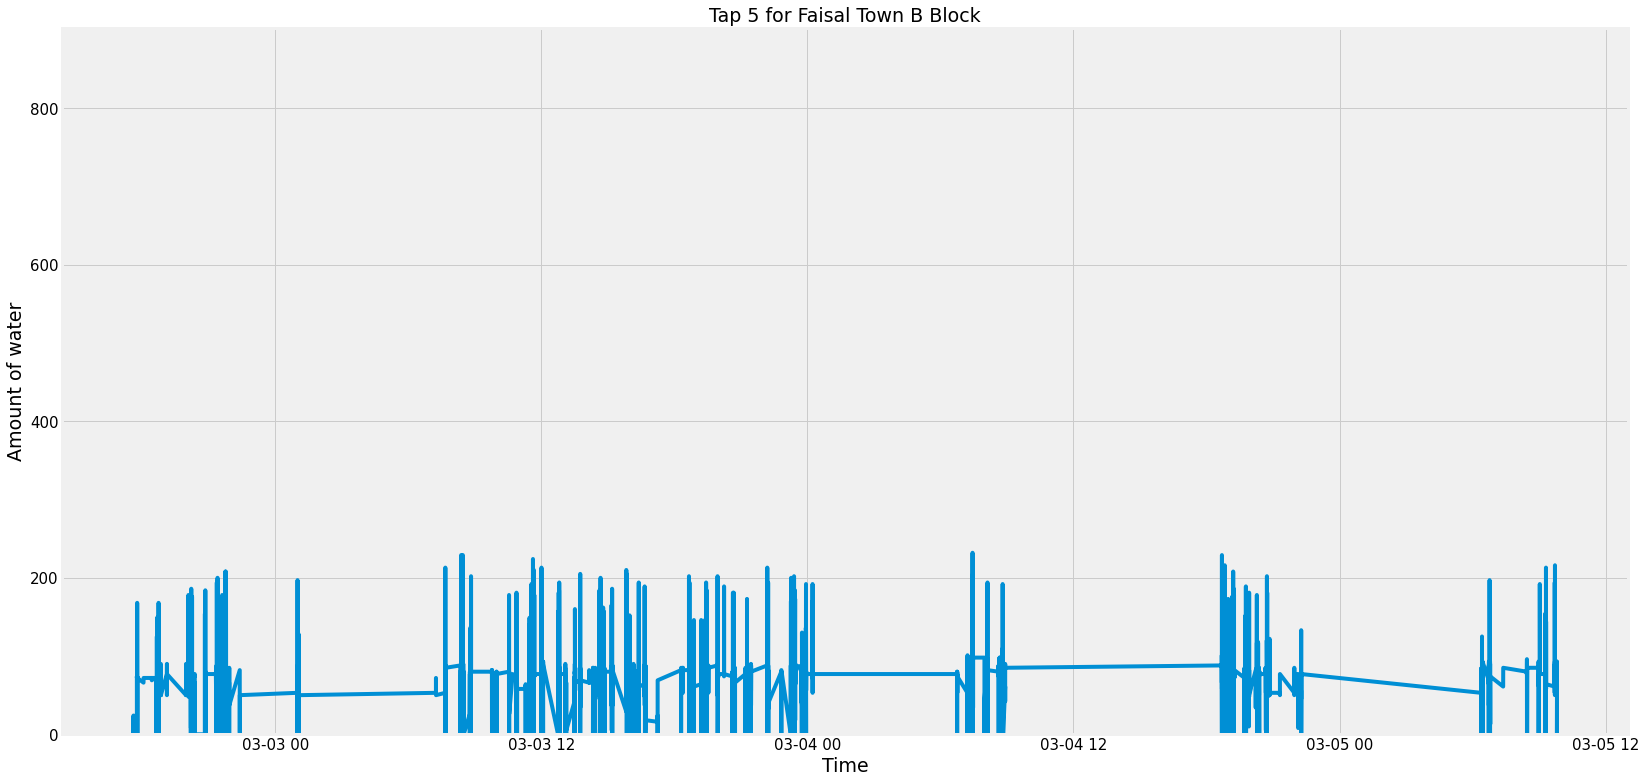

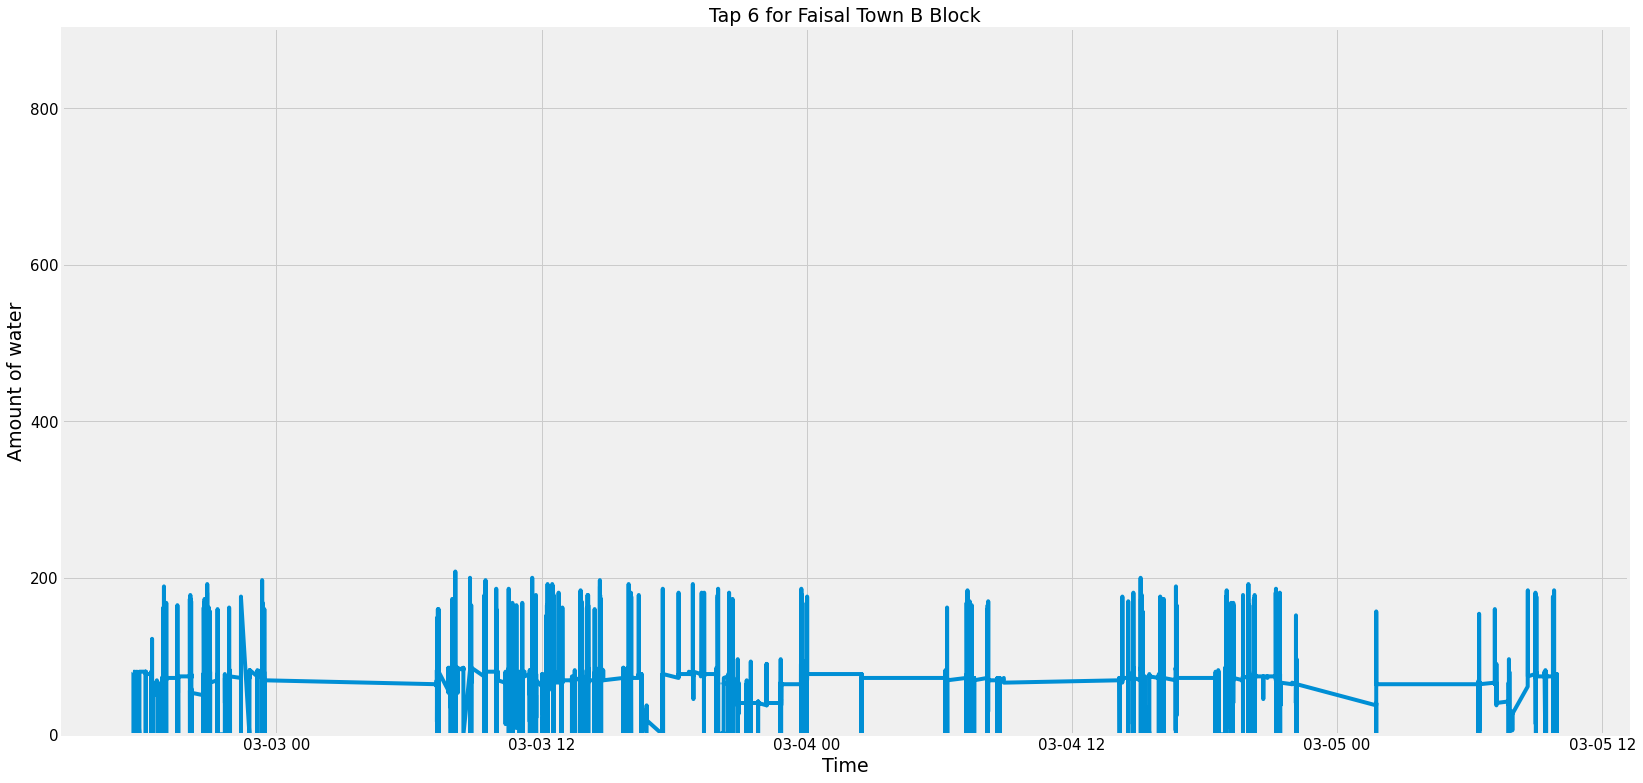

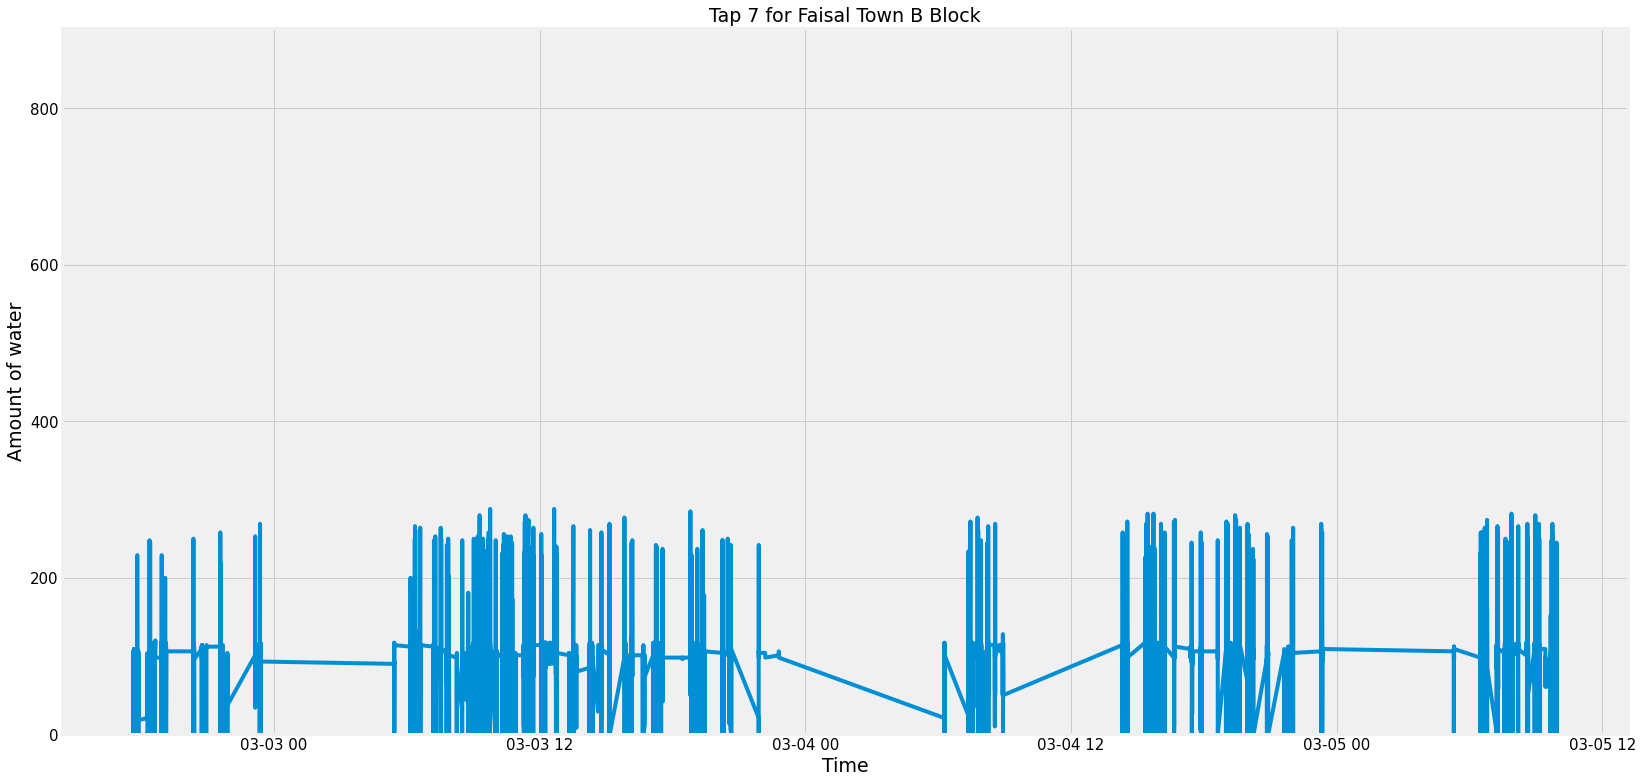

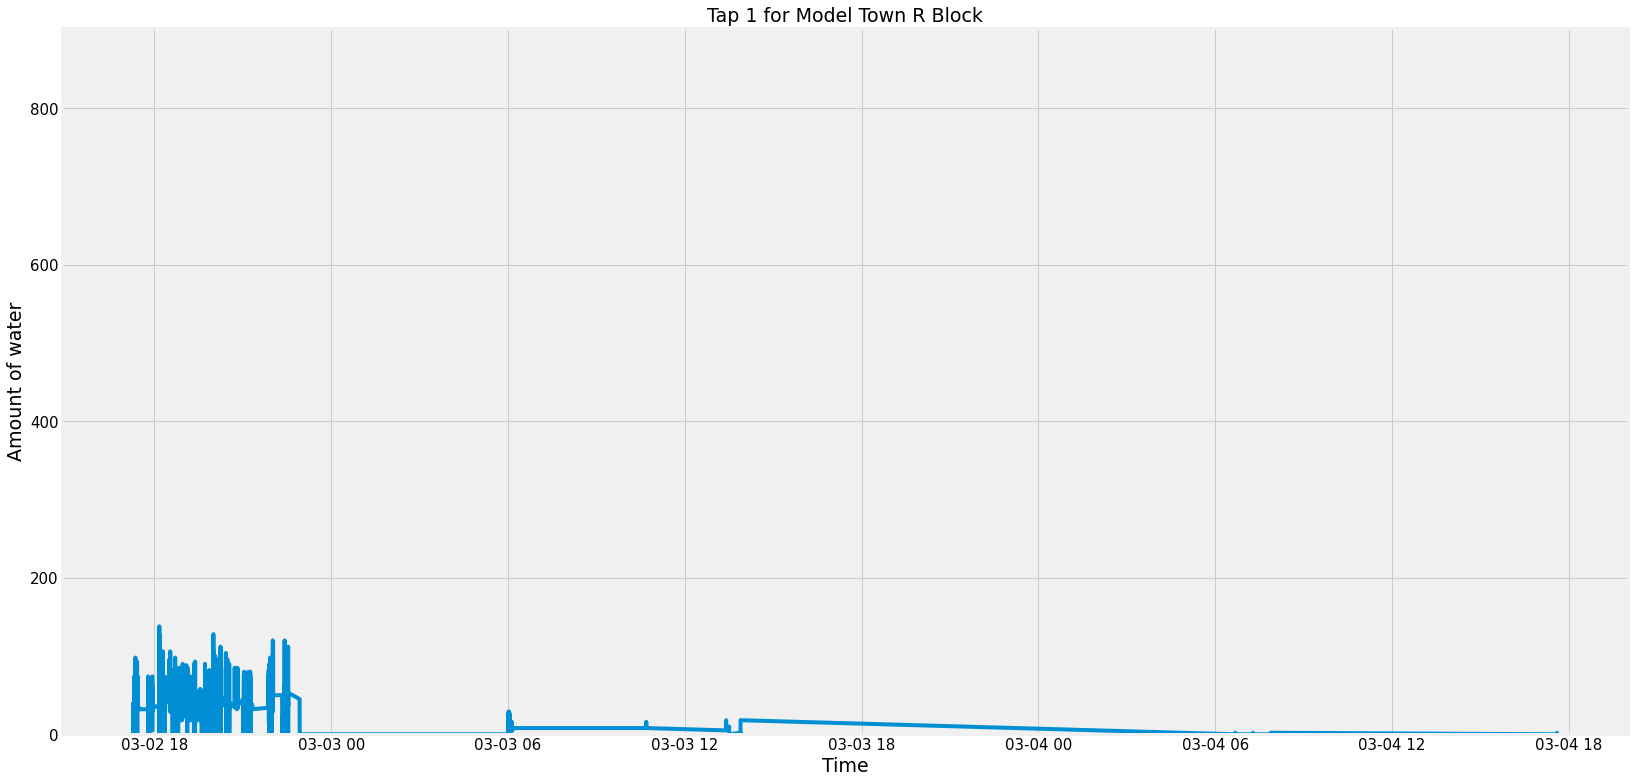

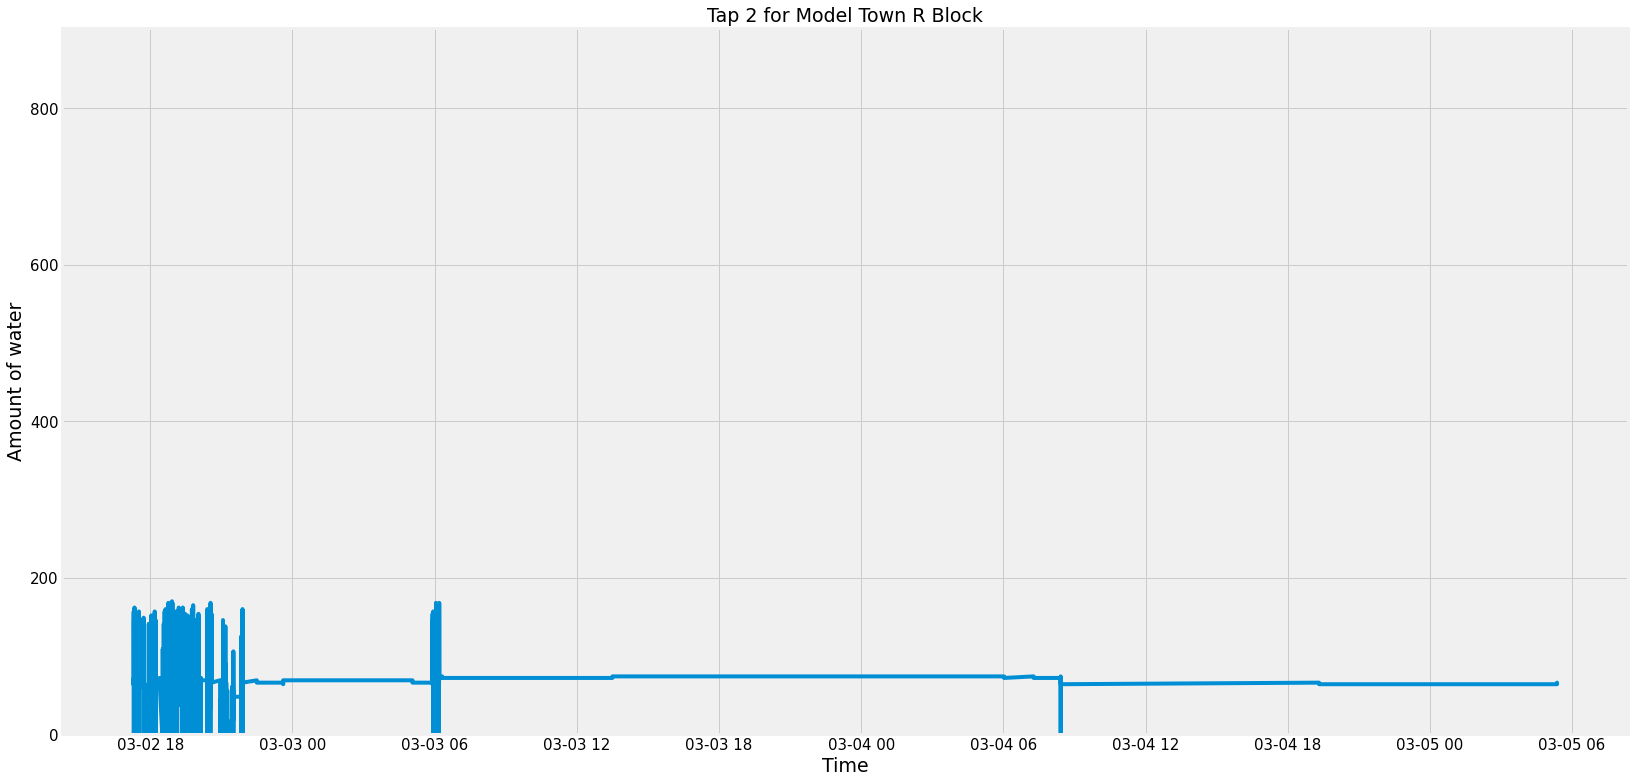

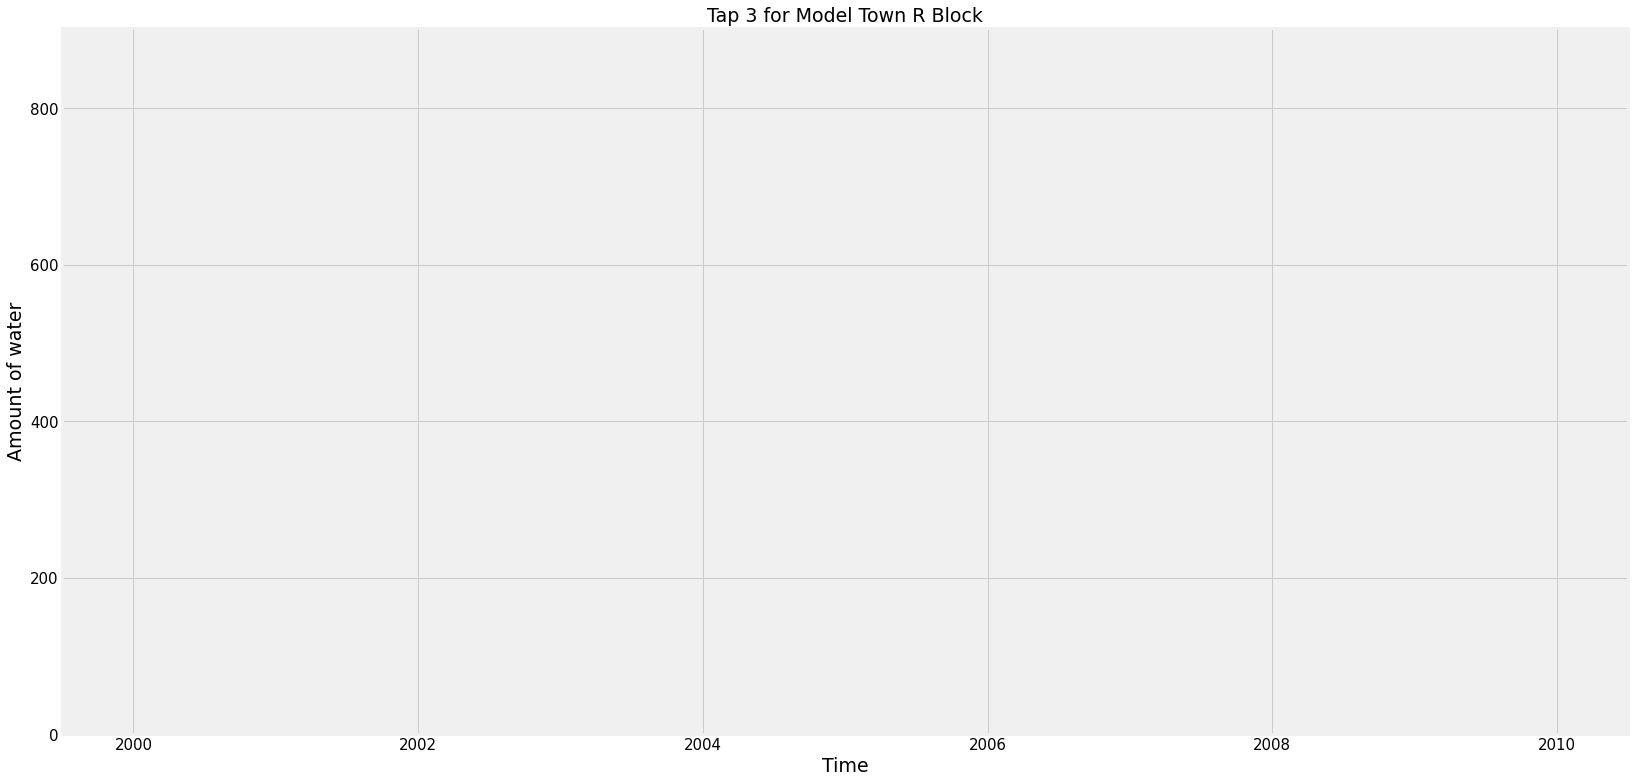

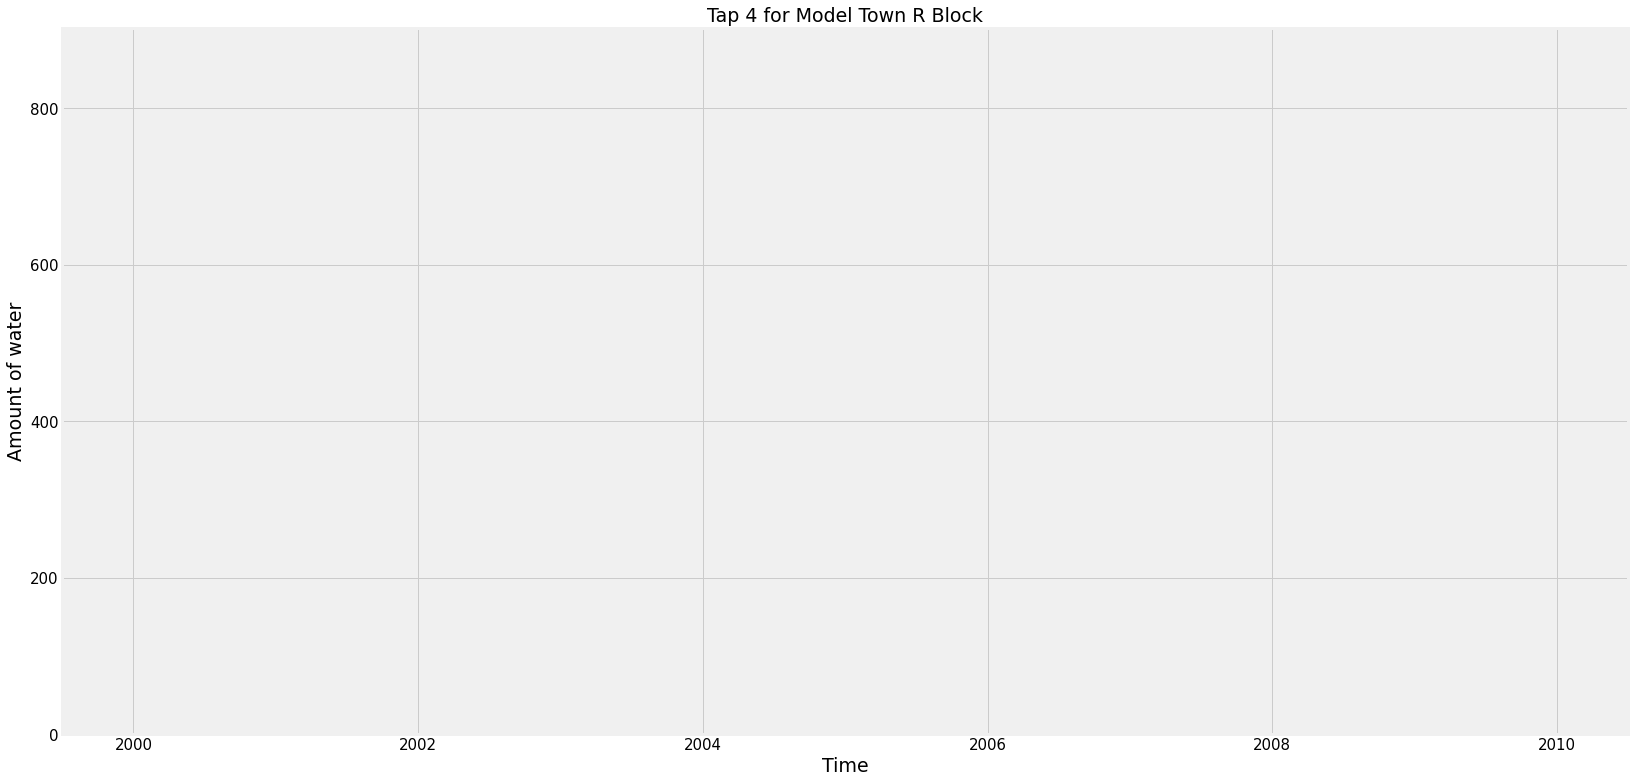

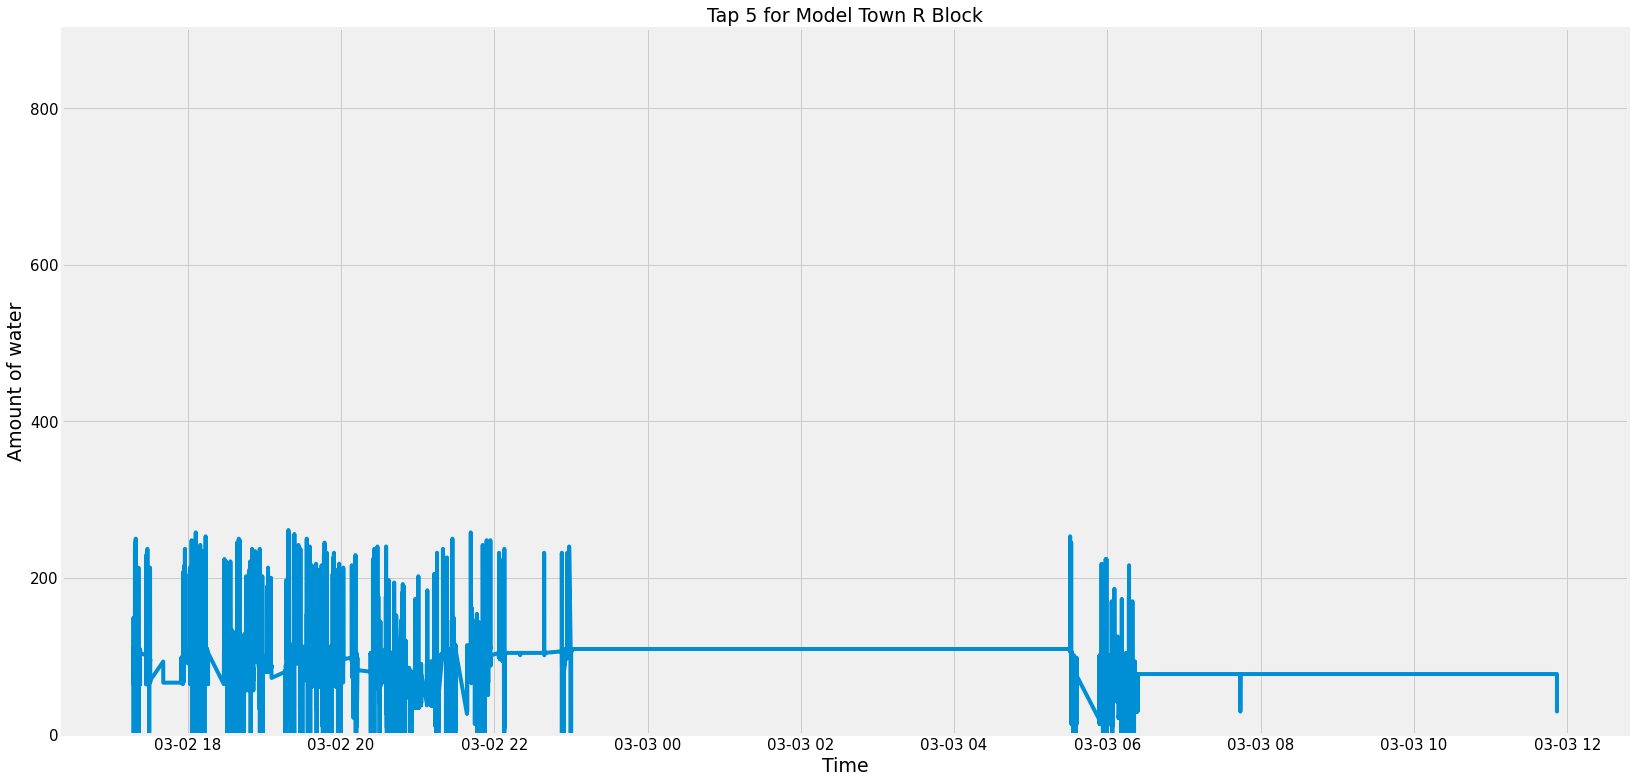

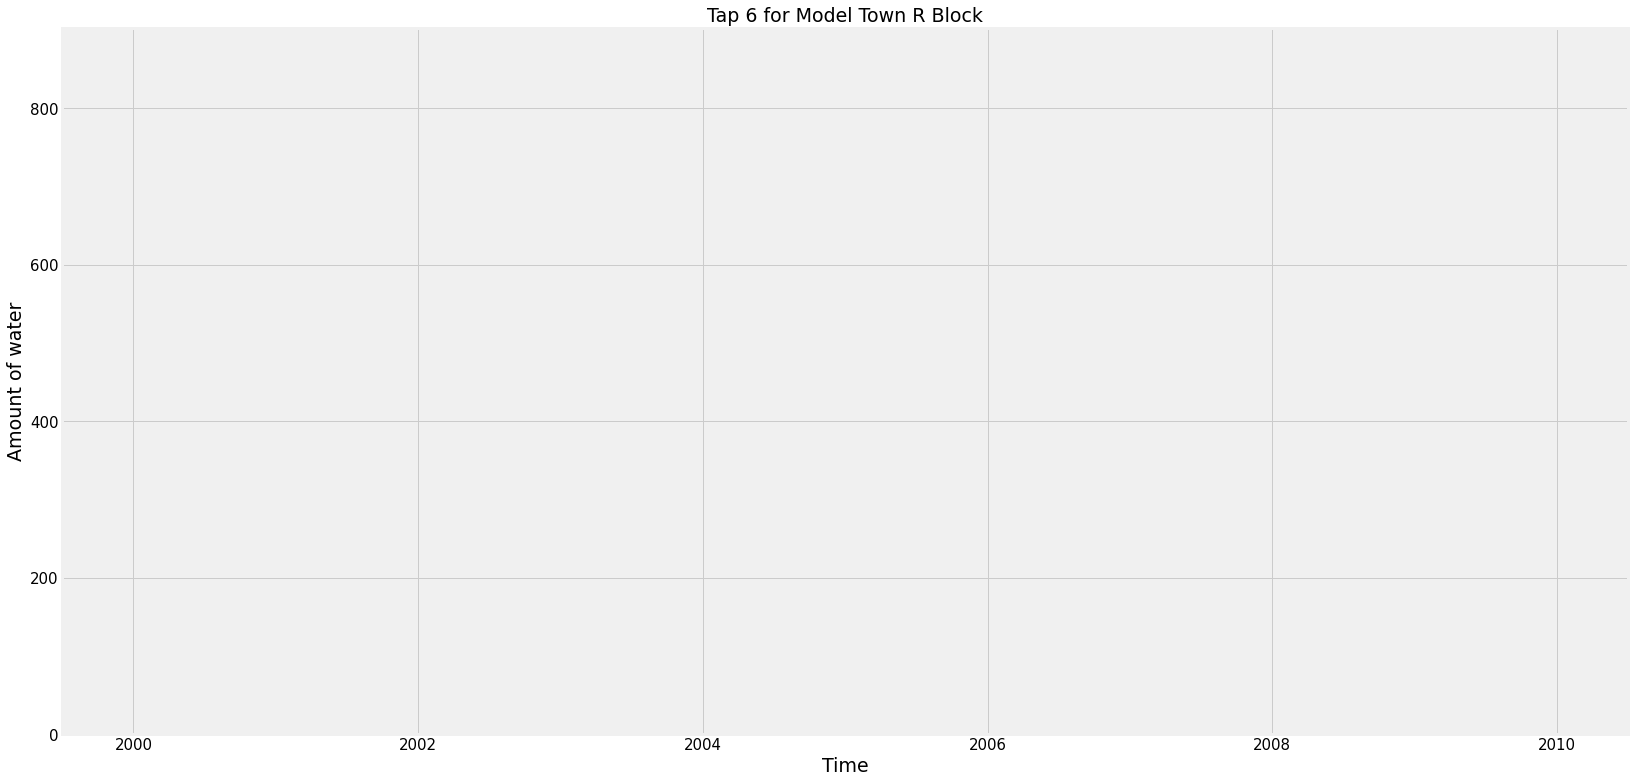

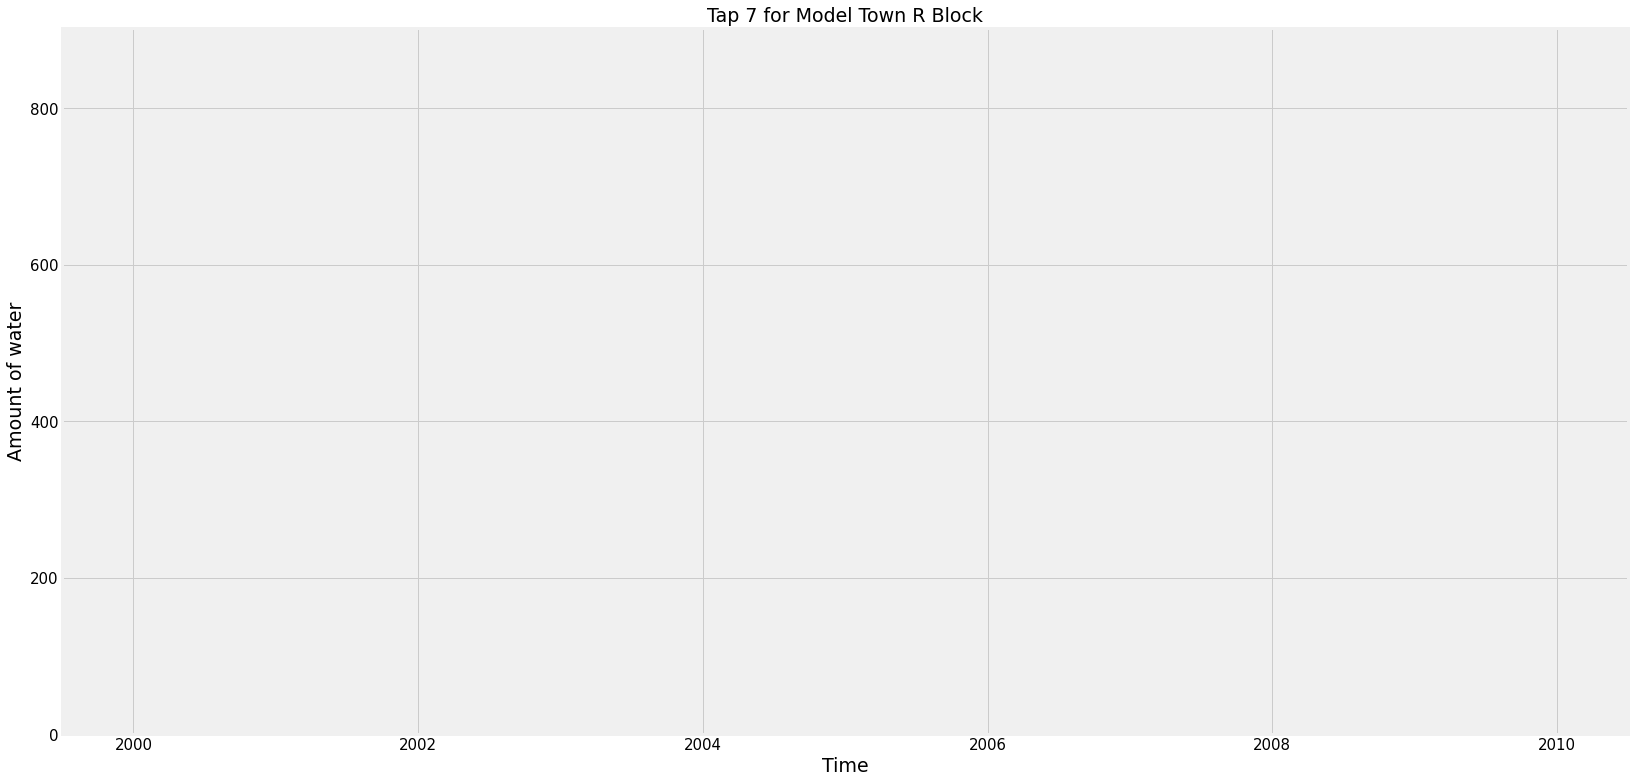

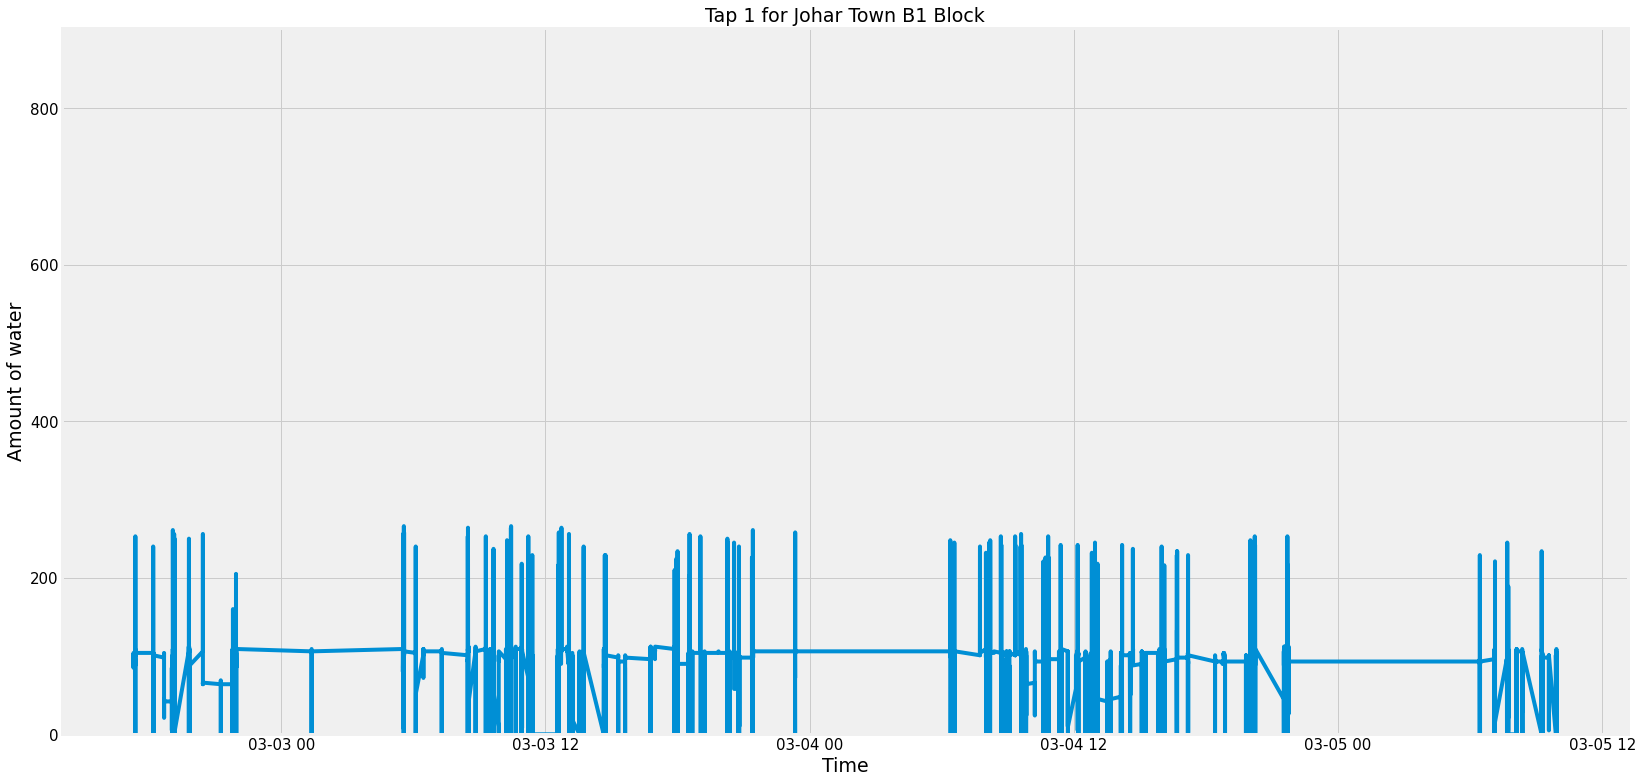

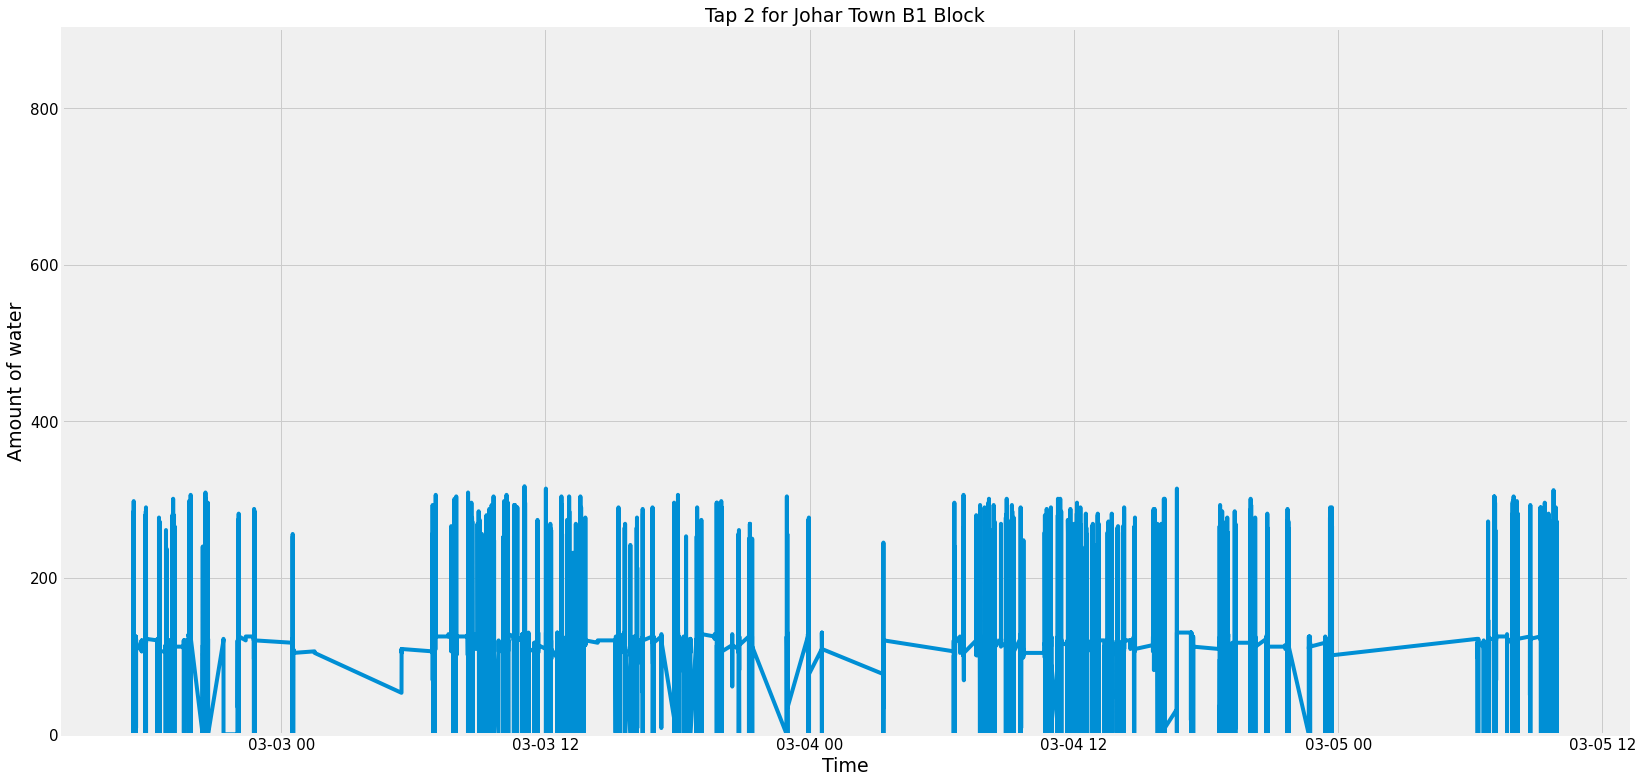

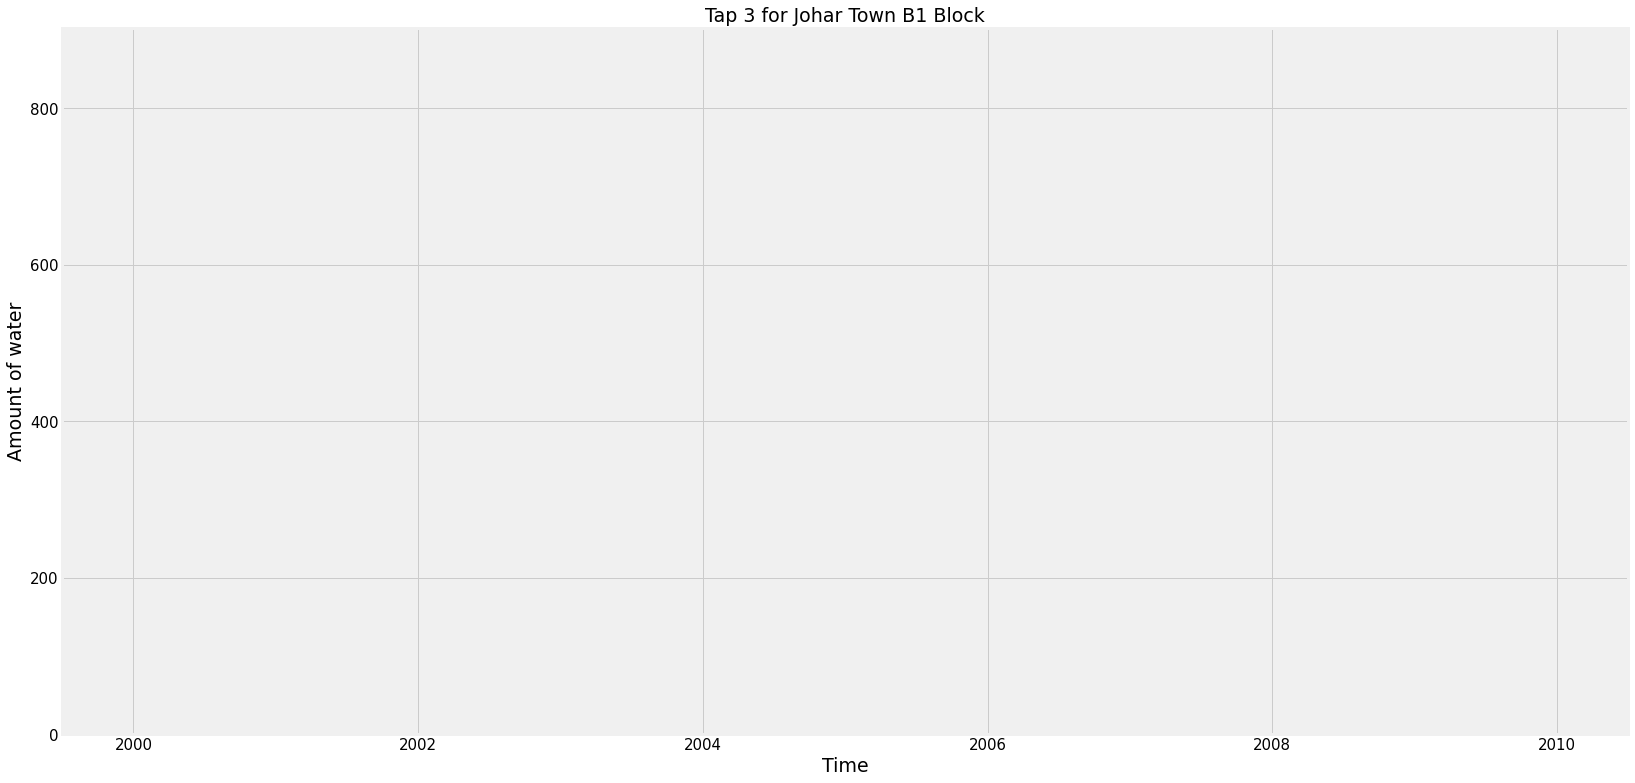

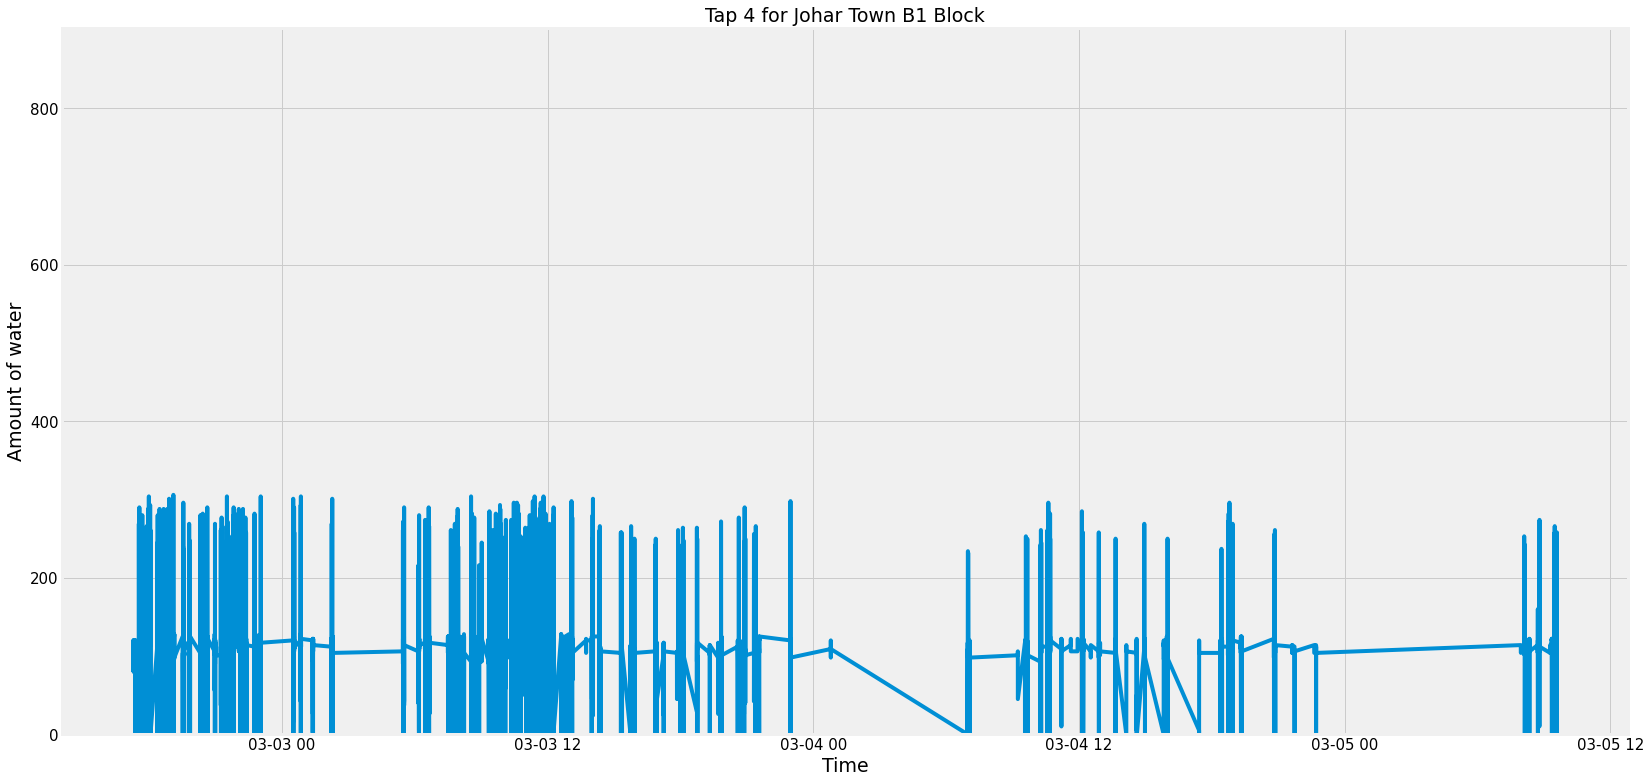

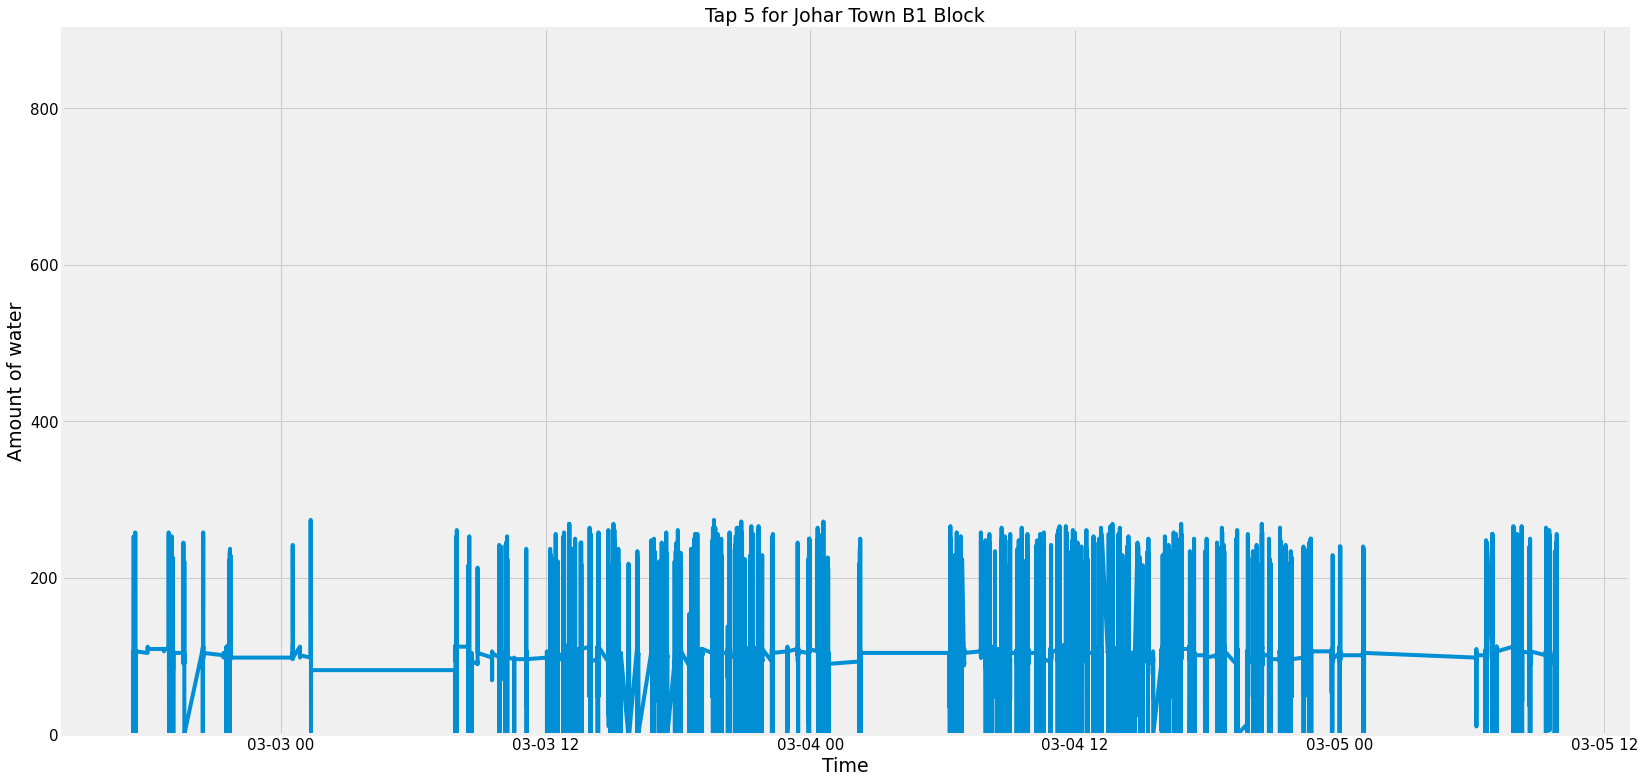

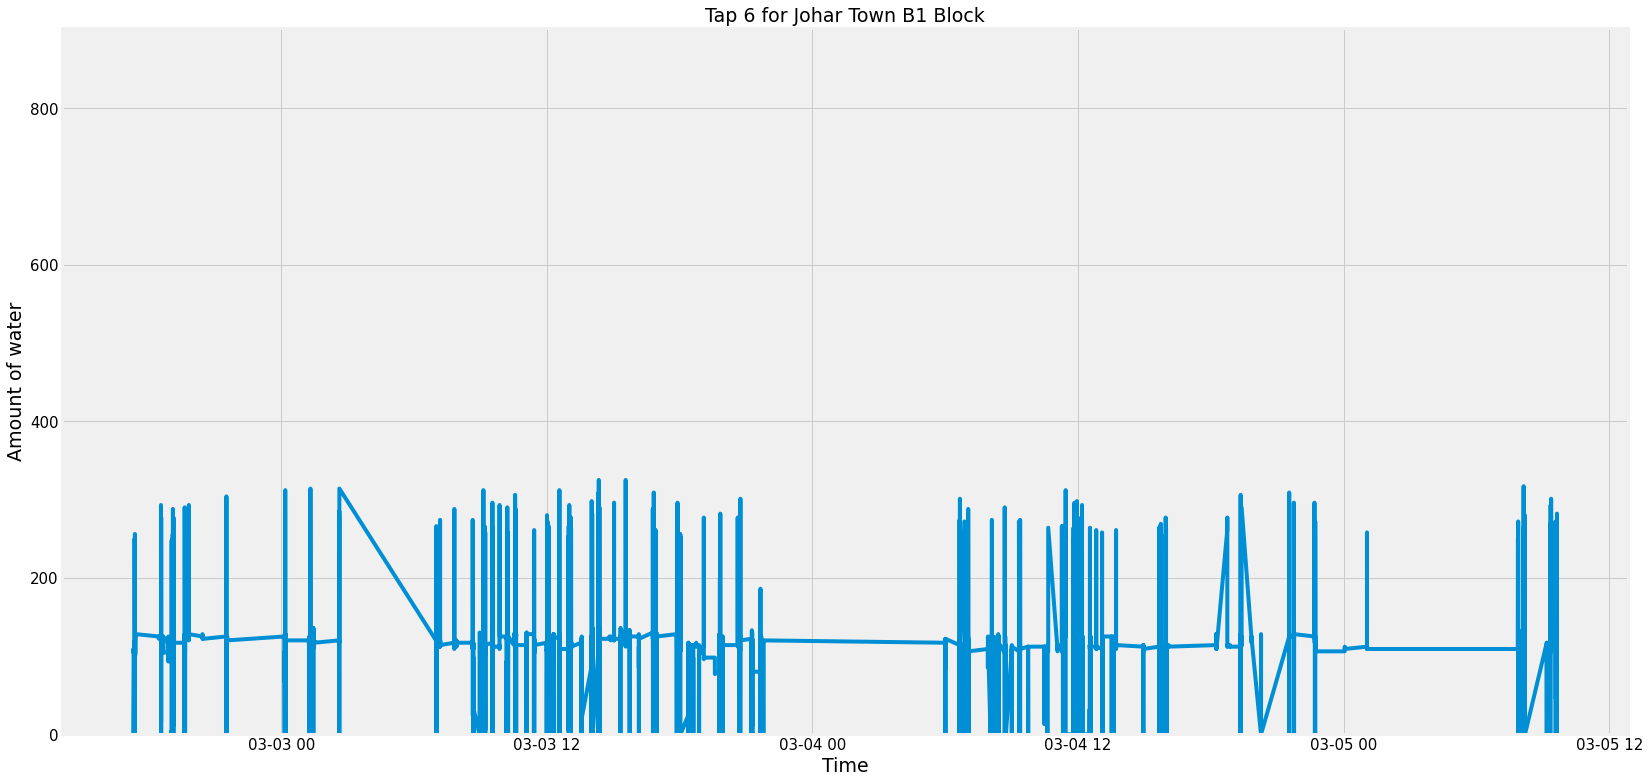

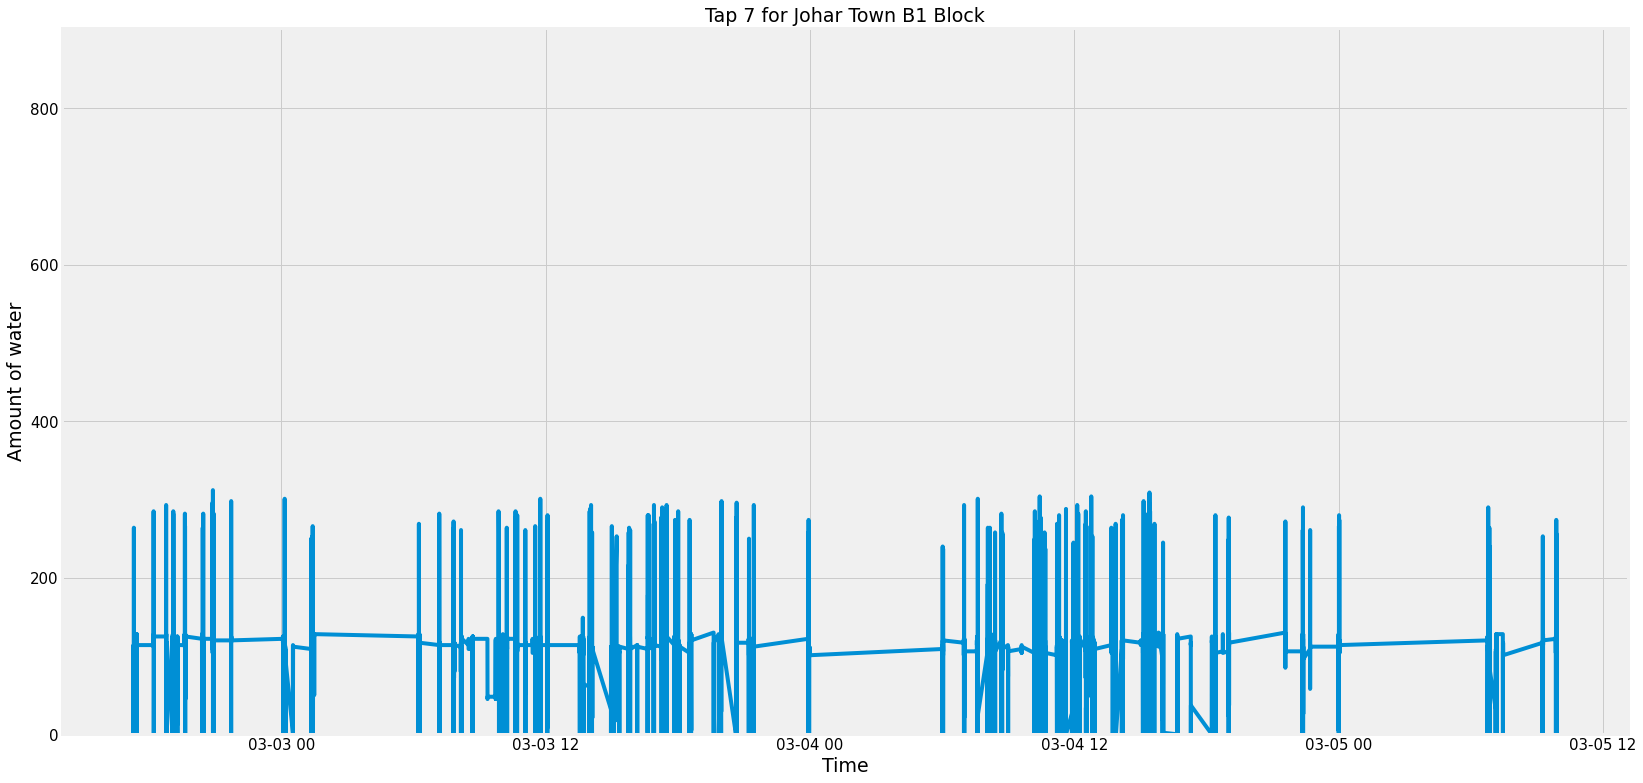

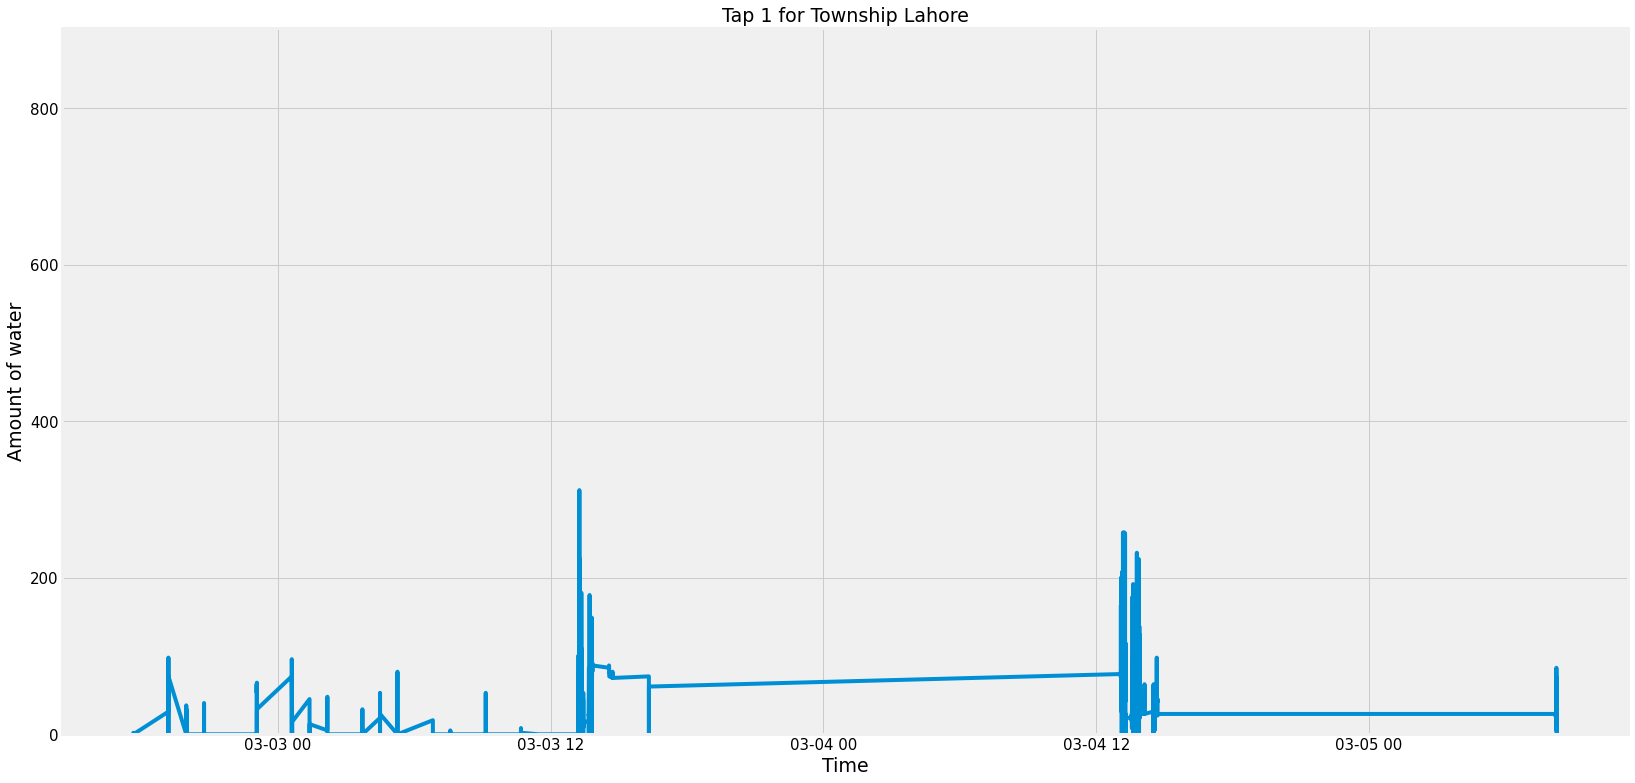

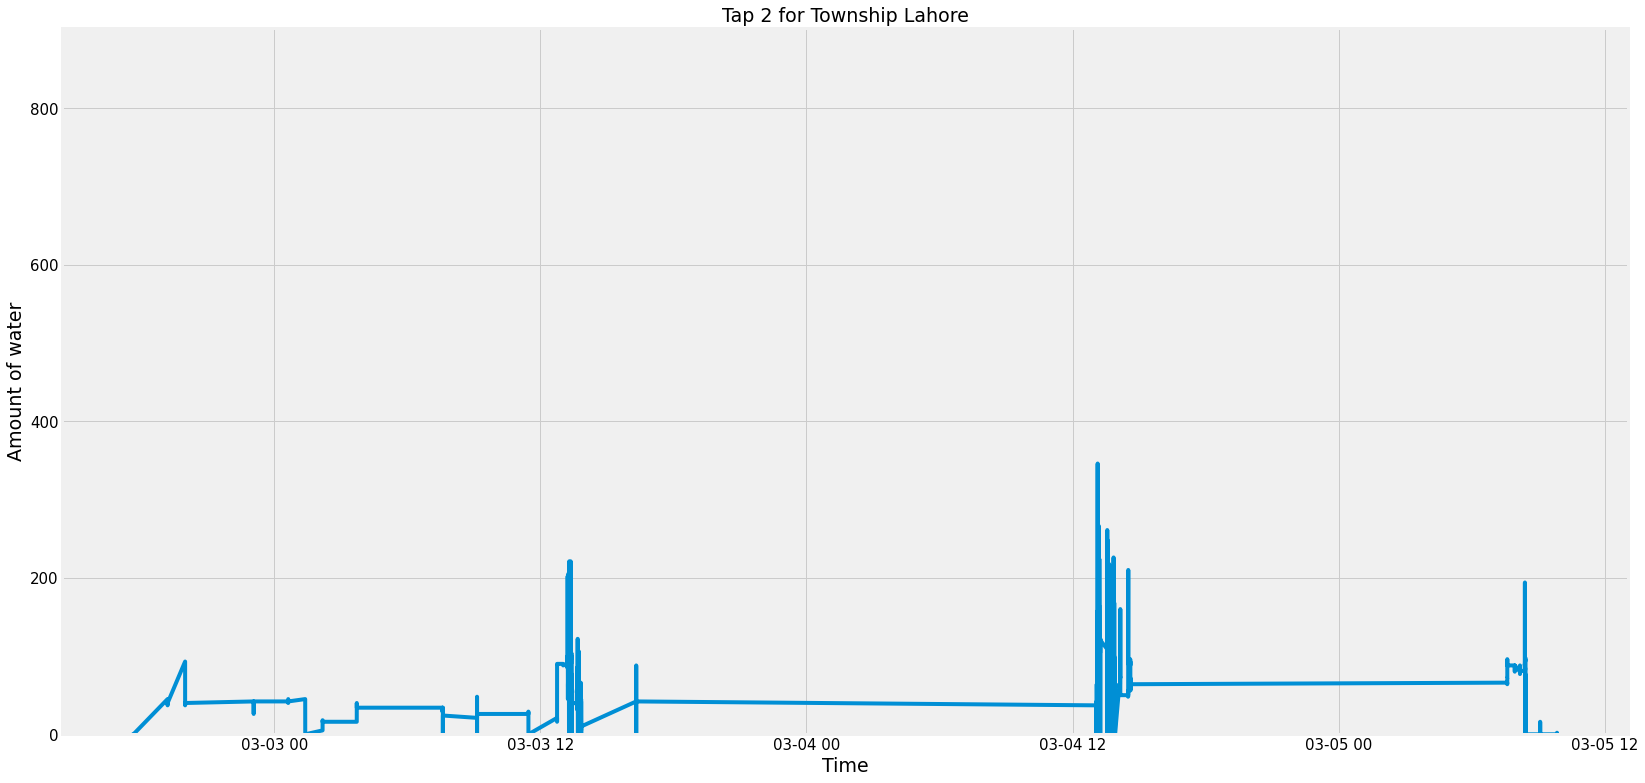

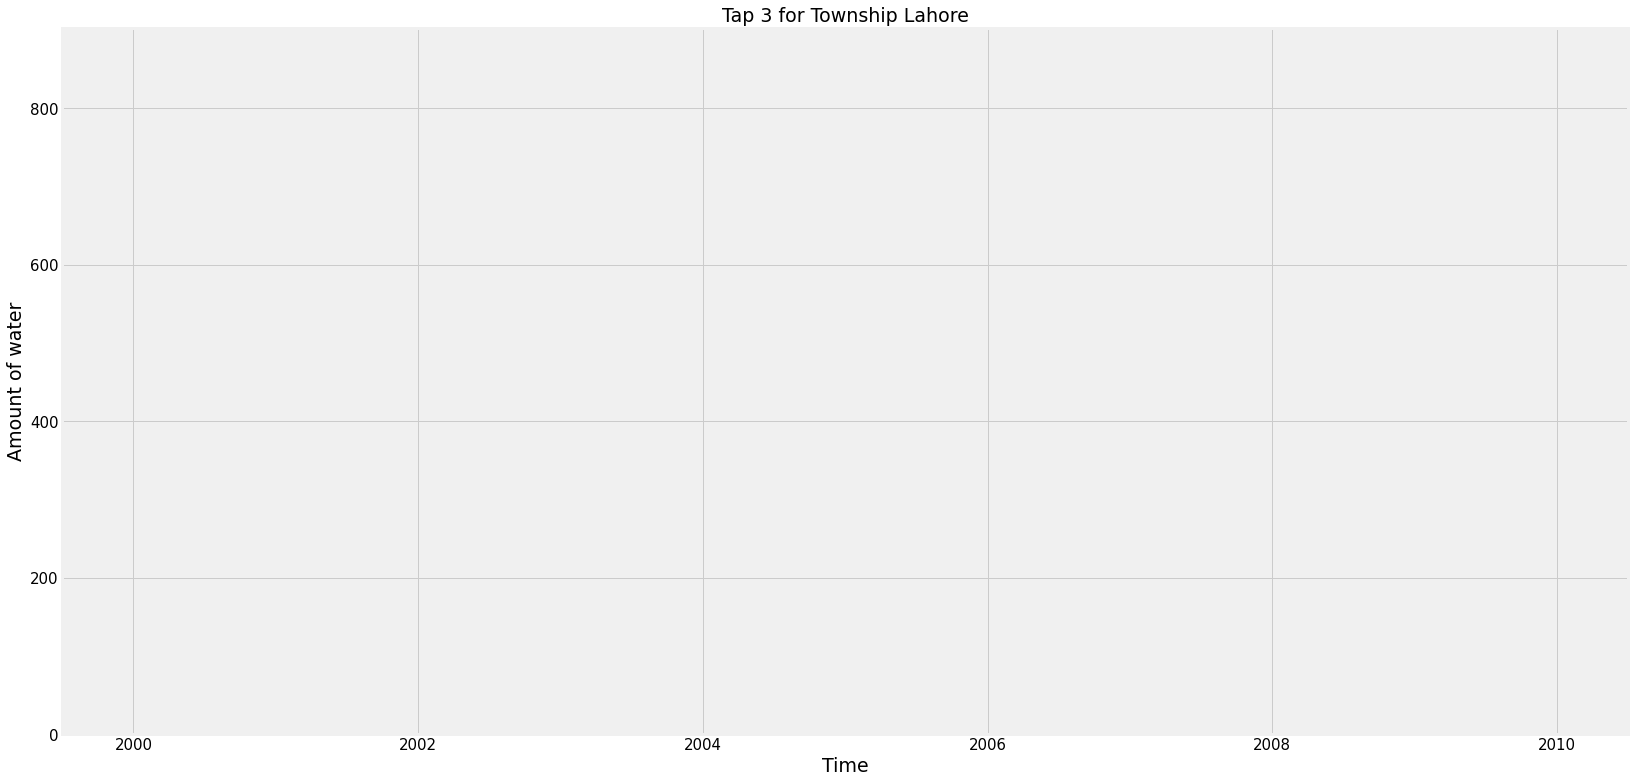

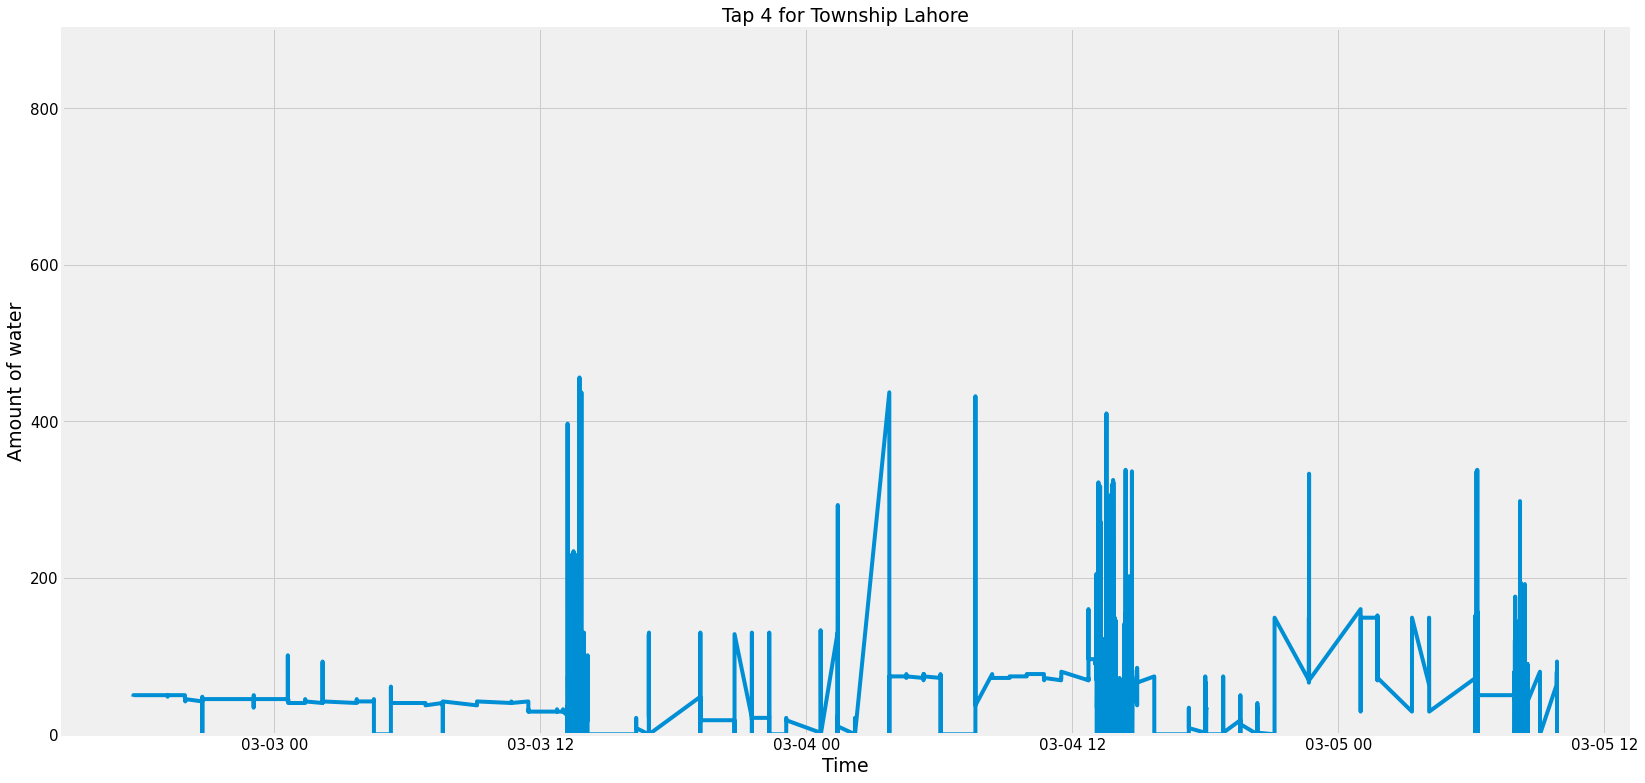

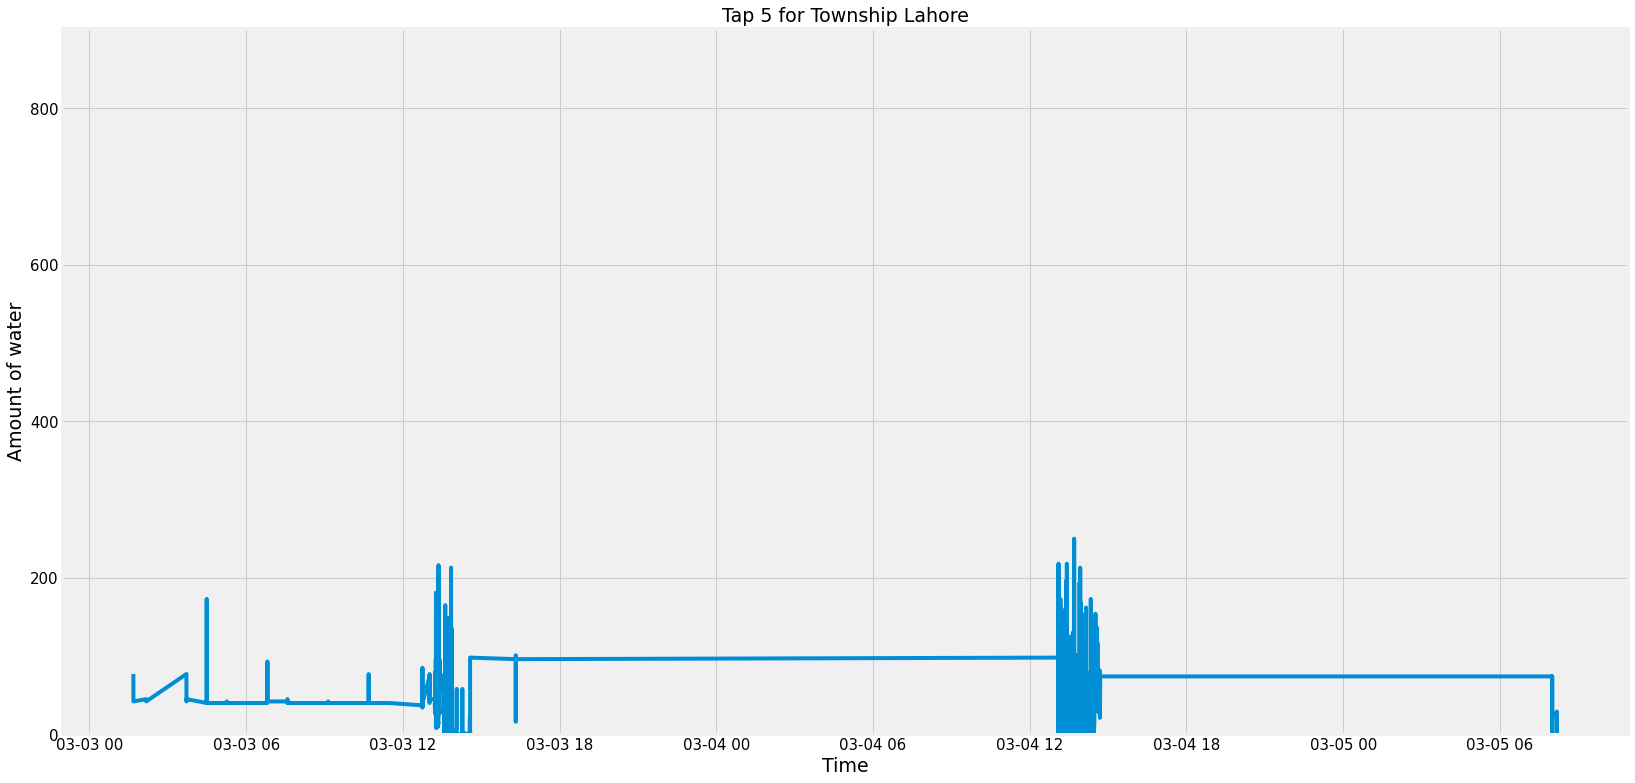

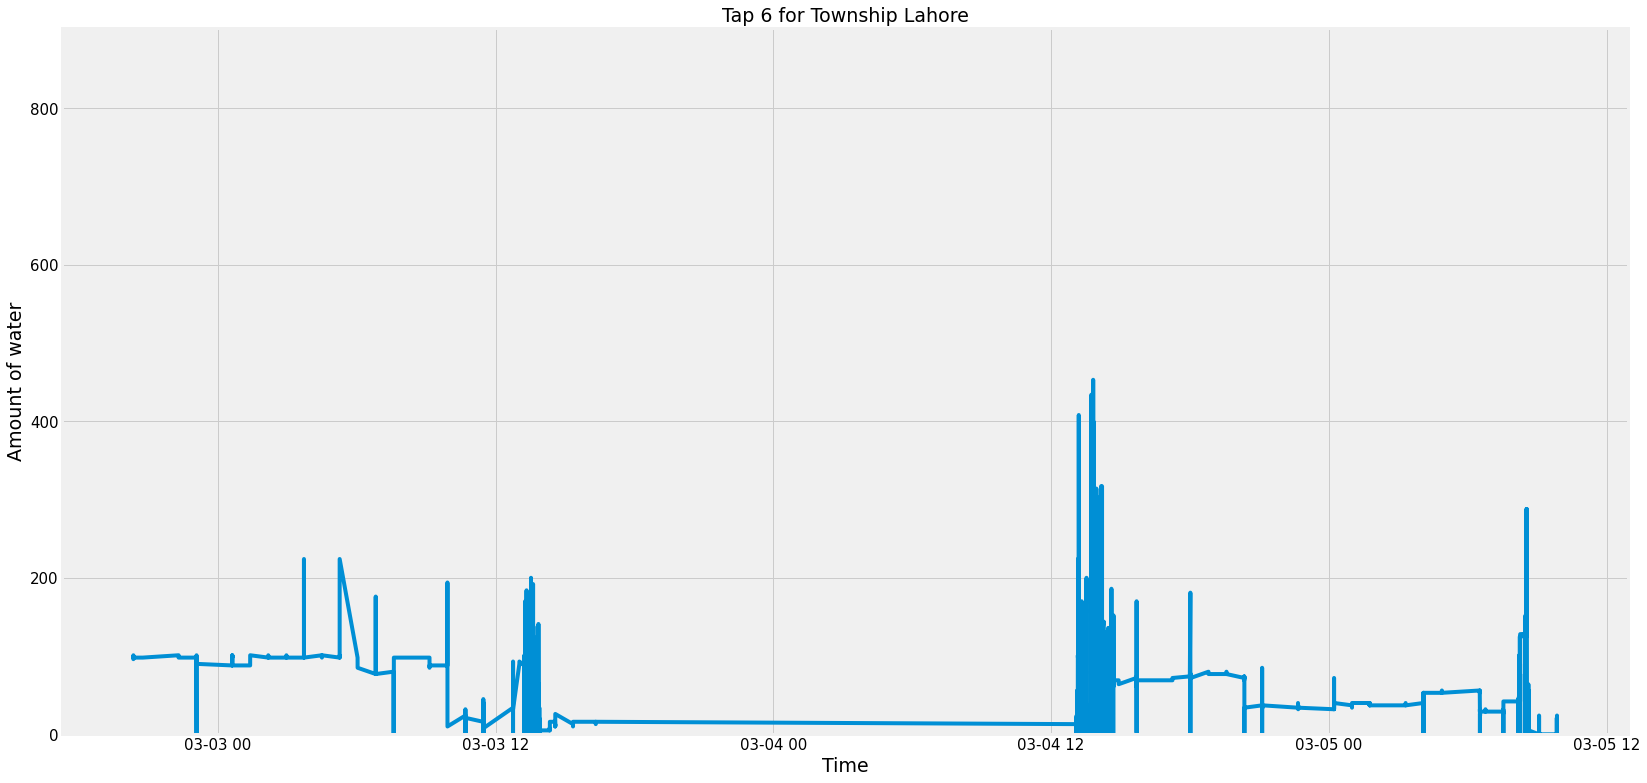

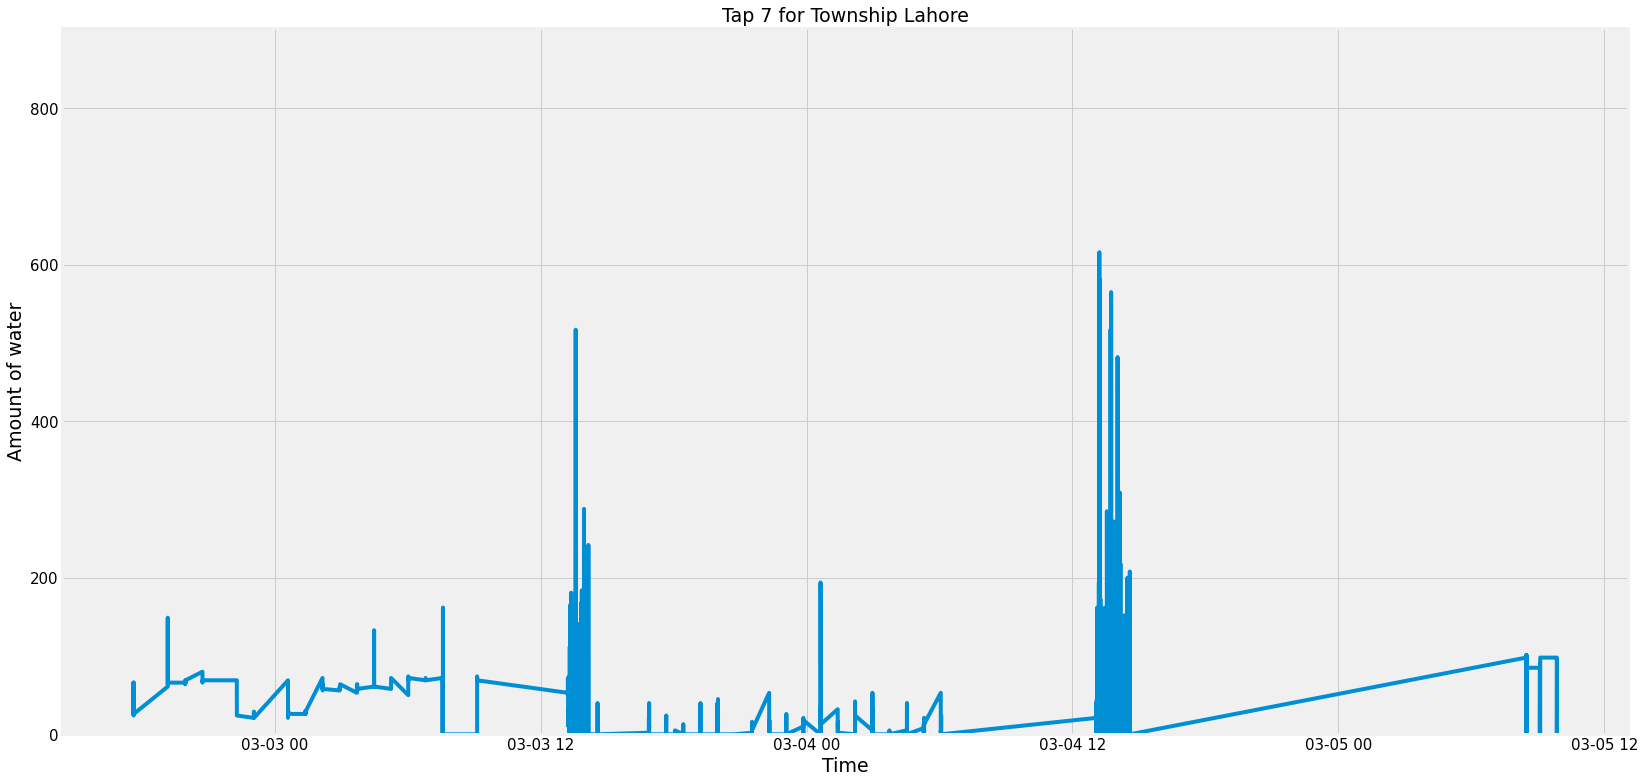

In [29]:
data_class.all_taps_location_plot()

# Imputation for values in the Data with the Mean of the column

In [30]:
#New data after filling the zero values with the mean
newdata= data_class.fill_waterAmount_of_0_values()
newdata.head()

,Filter_name,Filter_location,Amount_water,Pulses
Tim,,,,
2020-03-03 18:31:21,Tap 1,ITU Lahore,403.329987,201
2020-03-02 20:06:38,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:39,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:40,Tap 1,Faisal Town B Block,98.000000,49
2020-03-02 20:06:41,Tap 1,Faisal Town B Block,98.000000,49


In [31]:
newdata.describe()

,Amount_water,Pulses
count,257644.000000,257644.000000
mean,84.417051,39.205031
std,35.538816,20.853367
min,2.000000,0.000000
25%,66.000000,25.000000
50%,93.000000,46.000000
75%,109.000000,54.000000
max,904.440002,452.000000


In [32]:
df.describe()

,Filter_Location.1,Filter_Location.2
count,257644.000000,257644.000000
mean,78.725407,39.205031
std,41.755014,20.853367
min,0.000000,0.000000
25%,50.000000,25.000000
50%,93.000000,46.000000
75%,109.000000,54.000000
max,904.440002,452.000000
